# HOUSING: PRICE PREDICTION

Problem Statement:

Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market and there are various companies working in the domain. Data science comes as a very important tool to solve problems in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, recommendation systems are some of the machine learning techniques used for achieving the business goals for housing companies. Our problem is related to one such housing company.
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy houses to enter the market. You are required to build a model using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest in them or not. For this company wants to know:

Business Goal:

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the management to understand the pricing dynamics of a new market.

Technical Requirements:

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('train.csv')
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     127         120       RL          NaN     4928   Pave   NaN      IR1   
1     889          20       RL         95.0    15865   Pave   NaN      IR1   
2     793          60       RL         92.0     9920   Pave   NaN      IR1   
3     110          20       RL        105.0    11751   Pave   NaN      IR1   
4     422          20       RL          NaN    16635   Pave   NaN      IR1   
...   ...         ...      ...          ...      ...    ...   ...      ...   
1163  289          20       RL          NaN     9819   Pave   NaN      IR1   
1164  554          20       RL         67.0     8777   Pave   NaN      Reg   
1165  196         160       RL         24.0     2280   Pave   NaN      Reg   
1166   31          70  C (all)         50.0     8500   Pave  Pave      Reg   
1167  617          60       RL          NaN     7861   Pave   NaN      IR1   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1163         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1164         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1165         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1166         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1167         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2007        WD         Normal     128000  
1        10   2007        WD         Normal     268000  
2         6   2007        WD         Normal     269790  
3         1   2010       COD         Normal     190000  
4         6   2009        WD         Normal     215000  
...     ...    ...       ...            ...        ...  
1163      2   2010        WD         Normal     122000  
1164      5   2009        WD         Normal     108000  
1165      7   2009        WD         Normal     148500  
1166      7   2008        WD         Normal      40000  
1167      6   2006        WD         Normal     183200  

[1168 rows x 81 columns]

In [3]:
df1=pd.read_csv('test.csv')
df1

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     337          20       RL         86.0    14157   Pave   NaN      IR1   
1    1018         120       RL          NaN     5814   Pave   NaN      IR1   
2     929          20       RL          NaN    11838   Pave   NaN      Reg   
3    1148          70       RL         75.0    12000   Pave   NaN      Reg   
4    1227          60       RL         86.0    14598   Pave   NaN      IR1   
..    ...         ...      ...          ...      ...    ...   ...      ...   
287    83          20       RL         78.0    10206   Pave   NaN      Reg   
288  1048          20       RL         57.0     9245   Pave   NaN      IR2   
289    17          20       RL          NaN    11241   Pave   NaN      IR1   
290   523          50       RM         50.0     5000   Pave   NaN      Reg   
291  1379         160       RM         21.0     1953   Pave   NaN      Reg   

    LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0           HLS    AllPub  ...           0        0    NaN   NaN         NaN   
1           Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
2           Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
3           Bnk    AllPub  ...           0        0    NaN   NaN         NaN   
4           Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
..          ...       ...  ...         ...      ...    ...   ...         ...   
287         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
288         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
289         Lvl    AllPub  ...           0        0    NaN   NaN        Shed   
290         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
291         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   

    MiscVal MoSold  YrSold  SaleType  SaleCondition  
0         0      7    2007        WD         Normal  
1         0      8    2009       COD        Abnorml  
2         0      6    2009        WD         Normal  
3         0      7    2009        WD         Normal  
4         0      1    2008        WD         Normal  
..      ...    ...     ...       ...            ...  
287       0     10    2008        WD         Normal  
288       0      2    2008        WD         Normal  
289     700      3    2010        WD         Normal  
290       0     10    2006        WD         Normal  
291       0      6    2006        WD         Normal  

[292 rows x 80 columns]

In [4]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [5]:
df1.isnull().sum()

Id                0
MSSubClass        0
MSZoning          0
LotFrontage      45
LotArea           0
                 ..
MiscVal           0
MoSold            0
YrSold            0
SaleType          0
SaleCondition     0
Length: 80, dtype: int64

# Encoding the Dataset

In [6]:
from sklearn.preprocessing import LabelEncoder

In [300]:
le=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=le.fit_transform(df[i].values.reshape(-1,1))
df

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  \
0      127         120         3     70.98847     4928       1      2   
2      793          60         3     92.00000     9920       1      2   
5     1197          60         3     58.00000    14054       1      2   
6      561          20         3     70.98847    11341       1      2   
11     833          60         3     44.00000     9548       1      2   
...    ...         ...       ...          ...      ...     ...    ...   
1158   673          20         3     70.98847    11250       1      2   
1161  1301          60         3     70.98847    10762       1      2   
1163   289          20         3     70.98847     9819       1      2   
1165   196         160         3     24.00000     2280       1      2   
1167   617          60         3     70.98847     7861       1      2   

      LotShape  LandContour  LotConfig  ...  ScreenPorch  PoolQC  Fence  \
0            0            3          4  ...            0       3      4   
2            0            3          1  ...            0       3      4   
5            0            3          4  ...            0       3      4   
6            0            3          4  ...           95       3      4   
11           0            3          1  ...            0       3      4   
...        ...          ...        ...  ...          ...     ...    ...   
1158         0            3          4  ...            0       3      4   
1161         0            3          1  ...            0       3      4   
1163         0            3          4  ...            0       3      2   
1165         3            3          2  ...            0       3      4   
1167         0            3          4  ...            0       3      4   

      MiscFeature  MiscVal  MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0               4        0       2    2007         8              4     128000  
2               4        0       6    2007         8              4     269790  
5               4        0      11    2006         6              5     219210  
6               4        0       5    2010         8              4     121500  
11              4        0       1    2010         8              4     237000  
...           ...      ...     ...     ...       ...            ...        ...  
1158            4        0       6    2006         8              4     165000  
1161            4        0       5    2009         8              4     225000  
1163            4        0       2    2010         8              4     122000  
1165            4        0       7    2009         8              4     148500  
1167            4        0       6    2006         8              4     183200  

[447 rows x 79 columns]

In [8]:
for i in df1.columns:
    if df1[i].dtypes=='object':
        df1[i]=le.fit_transform(df1[i].values.reshape(-1,1))
df1

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  \
0     337          20         2         86.0    14157       1      2   
1    1018         120         2          NaN     5814       1      2   
2     929          20         2          NaN    11838       1      2   
3    1148          70         2         75.0    12000       1      2   
4    1227          60         2         86.0    14598       1      2   
..    ...         ...       ...          ...      ...     ...    ...   
287    83          20         2         78.0    10206       1      2   
288  1048          20         2         57.0     9245       1      2   
289    17          20         2          NaN    11241       1      2   
290   523          50         3         50.0     5000       1      2   
291  1379         160         3         21.0     1953       1      2   

     LotShape  LandContour  Utilities  ...  ScreenPorch  PoolArea  PoolQC  \
0           0            1          0  ...            0         0     NaN   
1           0            3          0  ...            0         0     NaN   
2           3            3          0  ...            0         0     NaN   
3           3            0          0  ...            0         0     NaN   
4           0            3          0  ...            0         0     NaN   
..        ...          ...        ...  ...          ...       ...     ...   
287         3            3          0  ...            0         0     NaN   
288         1            3          0  ...            0         0     NaN   
289         0            3          0  ...            0         0     NaN   
290         3            3          0  ...            0         0     NaN   
291         3            3          0  ...            0         0     NaN   

     Fence  MiscFeature  MiscVal  MoSold  YrSold  SaleType  SaleCondition  
0        4            2        0       7    2007         5              2  
1        4            2        0       8    2009         0              0  
2        4            2        0       6    2009         5              2  
3        4            2        0       7    2009         5              2  
4        4            2        0       1    2008         5              2  
..     ...          ...      ...     ...     ...       ...            ...  
287      4            2        0      10    2008         5              2  
288      4            2        0       2    2008         5              2  
289      4            1      700       3    2010         5              2  
290      4            2        0      10    2006         5              2  
291      4            2        0       6    2006         5              2  

[292 rows x 80 columns]

In [9]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [10]:
df1.isnull().sum()

Id                0
MSSubClass        0
MSZoning          0
LotFrontage      45
LotArea           0
                 ..
MiscVal           0
MoSold            0
YrSold            0
SaleType          0
SaleCondition     0
Length: 80, dtype: int64

In [11]:
df.iloc[:,:10].isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage    214
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
dtype: int64

In [12]:
df.iloc[:,10:20].isnull().sum()

LotConfig       0
LandSlope       0
Neighborhood    0
Condition1      0
Condition2      0
BldgType        0
HouseStyle      0
OverallQual     0
OverallCond     0
YearBuilt       0
dtype: int64

In [13]:
df.iloc[:,20:40].isnull().sum()

YearRemodAdd    0
RoofStyle       0
RoofMatl        0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
MasVnrArea      7
ExterQual       0
ExterCond       0
Foundation      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinSF1      0
BsmtFinType2    0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
Heating         0
dtype: int64

In [14]:
df.iloc[:,40:60].isnull().sum()

HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt     64
dtype: int64

In [15]:
df.iloc[:,60:81].isnull().sum()

GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
PoolQC           0
Fence            0
MiscFeature      0
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
dtype: int64

In [16]:
df1.iloc[:,:20].isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage     45
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
dtype: int64

In [17]:
df1.iloc[:,20:40].isnull().sum()

YearRemodAdd    0
RoofStyle       0
RoofMatl        0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
MasVnrArea      1
ExterQual       0
ExterCond       0
Foundation      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinSF1      0
BsmtFinType2    0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
Heating         0
dtype: int64

In [18]:
df1.iloc[:,40:60].isnull().sum()

HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt     17
dtype: int64

In [19]:
df1.iloc[:,60:80].isnull().sum()

GarageFinish       0
GarageCars         0
GarageArea         0
GarageQual         0
GarageCond         0
PavedDrive         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
PoolQC           292
Fence              0
MiscFeature        0
MiscVal            0
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
dtype: int64

# Removing the Null Values

In [20]:
df['LotFrontage']=df['LotFrontage'].fillna(np.mean(df['LotFrontage']))

In [21]:
df['MasVnrArea']=df['MasVnrArea'].fillna(np.mean(df['MasVnrArea']))

In [22]:
df['GarageYrBlt']=df['GarageYrBlt'].fillna(np.mean(df['GarageYrBlt']))

In [23]:
df.iloc[:,40:60].isnull().sum()

HeatingQC       0
CentralAir      0
Electrical      0
1stFlrSF        0
2ndFlrSF        0
LowQualFinSF    0
GrLivArea       0
BsmtFullBath    0
BsmtHalfBath    0
FullBath        0
HalfBath        0
BedroomAbvGr    0
KitchenAbvGr    0
KitchenQual     0
TotRmsAbvGrd    0
Functional      0
Fireplaces      0
FireplaceQu     0
GarageType      0
GarageYrBlt     0
dtype: int64

In [24]:
df.iloc[:,20:40].isnull().sum()

YearRemodAdd    0
RoofStyle       0
RoofMatl        0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
MasVnrArea      0
ExterQual       0
ExterCond       0
Foundation      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinSF1      0
BsmtFinType2    0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
Heating         0
dtype: int64

In [25]:
df.iloc[:,:10].isnull().sum()

Id             0
MSSubClass     0
MSZoning       0
LotFrontage    0
LotArea        0
Street         0
Alley          0
LotShape       0
LandContour    0
Utilities      0
dtype: int64

In [26]:
df1['LotFrontage']=df1['LotFrontage'].fillna(np.mean(df1['LotFrontage']))

In [27]:
df1['MasVnrArea']=df1['MasVnrArea'].fillna(np.mean(df1['MasVnrArea']))

In [28]:
df1['GarageYrBlt']=df1['GarageYrBlt'].fillna(np.mean(df1['GarageYrBlt']))

In [29]:
df1['PoolQC']=df1['PoolQC'].fillna(np.mean(df1['PoolQC']))

In [30]:
df1.iloc[:,60:80].isnull().sum()

GarageFinish       0
GarageCars         0
GarageArea         0
GarageQual         0
GarageCond         0
PavedDrive         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
PoolQC           292
Fence              0
MiscFeature        0
MiscVal            0
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
dtype: int64

In [31]:
df1.drop('PoolQC',axis=1,inplace=True)

In [32]:
df1.iloc[:,40:60].isnull().sum()

HeatingQC       0
CentralAir      0
Electrical      0
1stFlrSF        0
2ndFlrSF        0
LowQualFinSF    0
GrLivArea       0
BsmtFullBath    0
BsmtHalfBath    0
FullBath        0
HalfBath        0
BedroomAbvGr    0
KitchenAbvGr    0
KitchenQual     0
TotRmsAbvGrd    0
Functional      0
Fireplaces      0
FireplaceQu     0
GarageType      0
GarageYrBlt     0
dtype: int64

In [33]:
df1.iloc[:,20:40].isnull().sum()

YearRemodAdd    0
RoofStyle       0
RoofMatl        0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
MasVnrArea      0
ExterQual       0
ExterCond       0
Foundation      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinSF1      0
BsmtFinType2    0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
Heating         0
dtype: int64

In [34]:
df1.iloc[:,60:80].isnull().sum()

GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
Fence            0
MiscFeature      0
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
dtype: int64

In [35]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [36]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning           int64
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType           int64
SaleCondition      int64
SalePrice          int64
Length: 81, dtype: object

# Visualization of Dataset

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Id', ylabel='Count'>

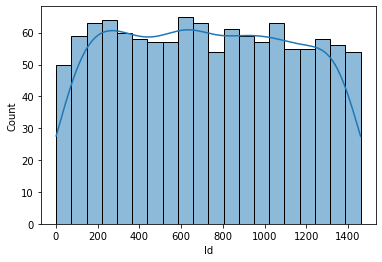

In [38]:
sns.histplot(x='Id',data=df,bins=20,kde=True)

<AxesSubplot:xlabel='Id', ylabel='Count'>

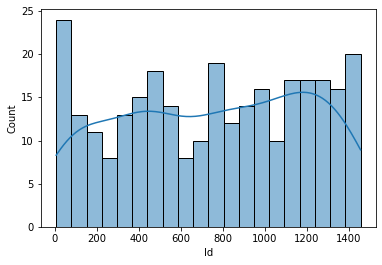

In [39]:
sns.histplot(x='Id',data=df1,bins=20,kde=True)

20     428
60     244
50     113
120     69
70      53
30      52
160     47
80      43
90      41
190     26
85      19
75      14
45      10
180      6
40       3
Name: MSSubClass, dtype: int64


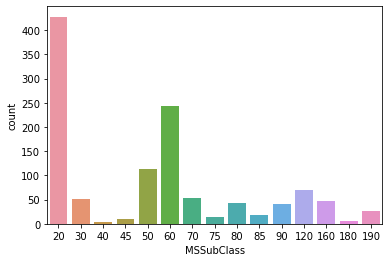

In [40]:
sns.countplot(x='MSSubClass',data=df)
print(df['MSSubClass'].value_counts())

20     108
60      55
50      31
120     18
30      17
160     16
80      15
90      11
70       7
190      4
180      4
75       2
45       2
85       1
40       1
Name: MSSubClass, dtype: int64


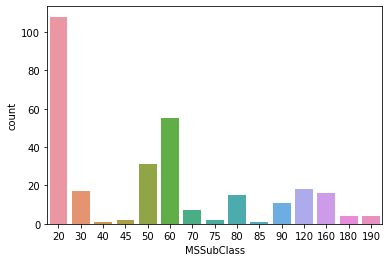

In [41]:
sns.countplot(x='MSSubClass',data=df1)
print(df1['MSSubClass'].value_counts())

3    928
4    163
1     52
2     16
0      9
Name: MSZoning, dtype: int64


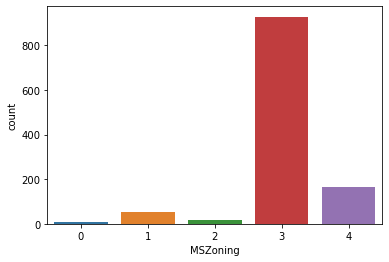

In [42]:
sns.countplot(x='MSZoning',data=df)
print(df['MSZoning'].value_counts())

3    928
4    163
1     52
2     16
0      9
Name: MSZoning, dtype: int64


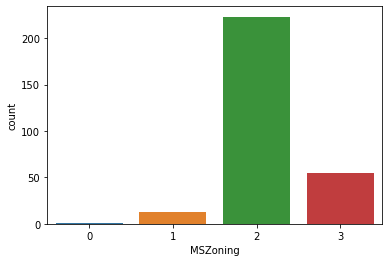

In [43]:
sns.countplot(x="MSZoning",data=df1)
print(df["MSZoning"].value_counts())

<AxesSubplot:xlabel='LotFrontage', ylabel='Count'>

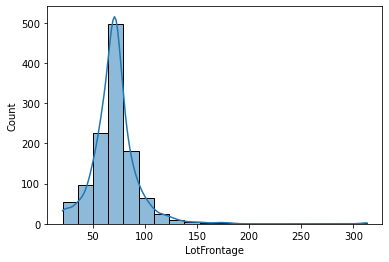

In [44]:
sns.histplot(x='LotFrontage',data=df,bins=20,kde=True)

<AxesSubplot:xlabel='LotFrontage', ylabel='Count'>

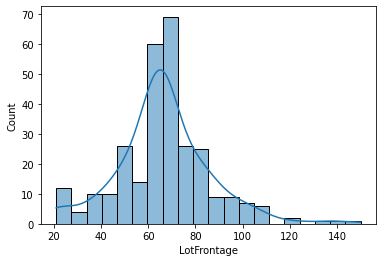

In [45]:
sns.histplot(x='LotFrontage',data=df1,bins=20,kde=True)

<AxesSubplot:xlabel='LotArea', ylabel='Count'>

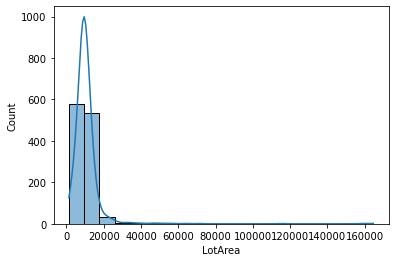

In [46]:
sns.histplot(x='LotArea',data=df,bins=20,kde=True)

<AxesSubplot:xlabel='LotArea', ylabel='Count'>

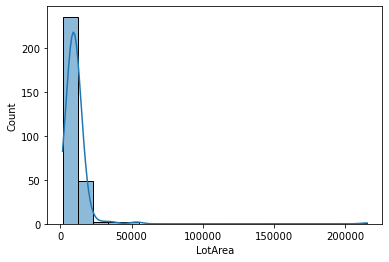

In [47]:
sns.histplot(x='LotArea',data=df1,bins=20,kde=True)

<AxesSubplot:xlabel='Street', ylabel='Count'>

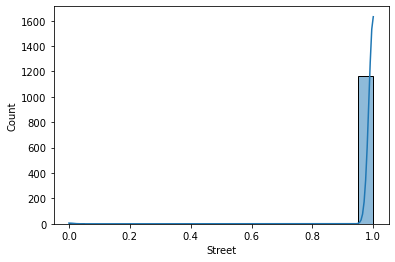

In [48]:
sns.histplot(x='Street',data=df,bins=20,kde=True)

<AxesSubplot:xlabel='Street', ylabel='Count'>

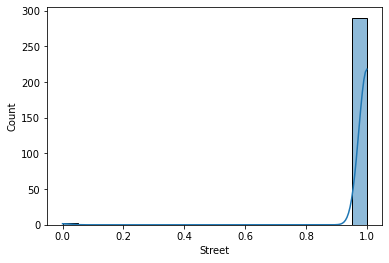

In [49]:
sns.histplot(x='Street',data=df1,bins=20,kde=True)

2    1091
0      41
1      36
Name: Alley, dtype: int64


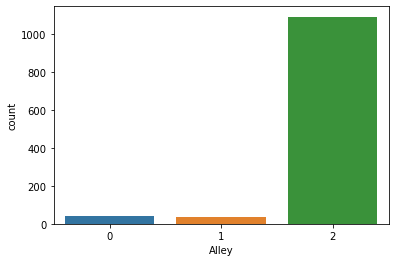

In [50]:
sns.countplot(x='Alley',data=df)
print(df['Alley'].value_counts())

2    278
0      9
1      5
Name: Alley, dtype: int64


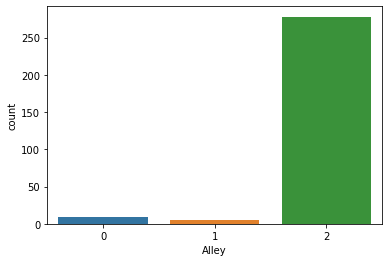

In [51]:
sns.countplot(x='Alley',data=df1)
print(df1['Alley'].value_counts())

3    740
0    390
1     32
2      6
Name: LotShape, dtype: int64


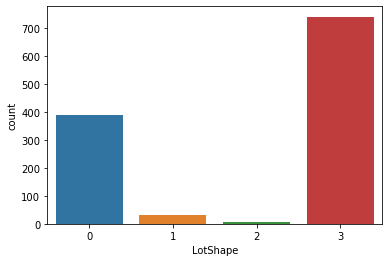

In [52]:
sns.countplot(x='LotShape',data=df)
print(df['LotShape'].value_counts())

3    185
0     94
1      9
2      4
Name: LotShape, dtype: int64


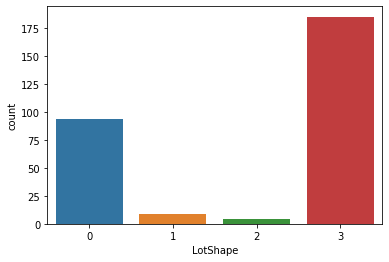

In [53]:
sns.countplot(x='LotShape',data=df1)
print(df1['LotShape'].value_counts())

3    1046
0      50
1      42
2      30
Name: LandContour, dtype: int64


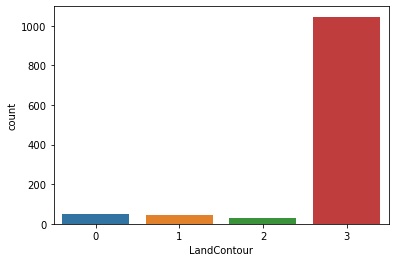

In [54]:
sns.countplot(x='LandContour',data=df)
print(df['LandContour'].value_counts())

3    265
0     13
1      8
2      6
Name: LandContour, dtype: int64


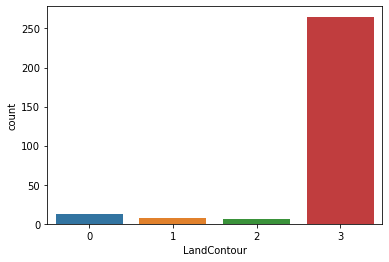

In [55]:
sns.countplot(x='LandContour',data=df1)
print(df1['LandContour'].value_counts())

0    1168
Name: Utilities, dtype: int64


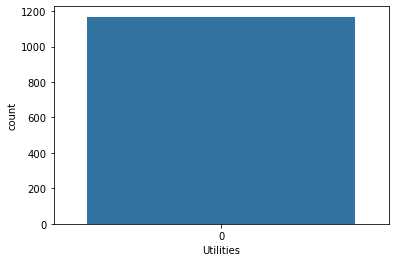

In [56]:
sns.countplot(x='Utilities',data=df)
print(df['Utilities'].value_counts())

0    291
1      1
Name: Utilities, dtype: int64


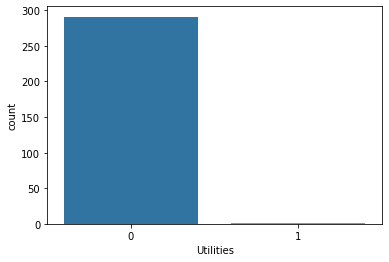

In [57]:
sns.countplot(x='Utilities',data=df1)
print(df1['Utilities'].value_counts())

4    842
0    222
1     69
2     33
3      2
Name: LotConfig, dtype: int64


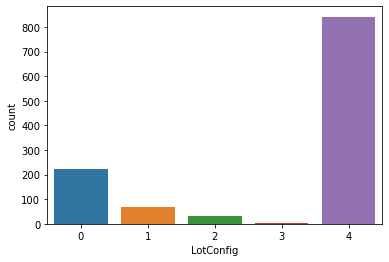

In [58]:
sns.countplot(x='LotConfig',data=df)
print(df['LotConfig'].value_counts())

4    210
0     41
1     25
2     14
3      2
Name: LotConfig, dtype: int64


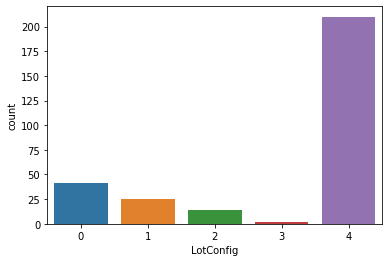

In [59]:
sns.countplot(x='LotConfig',data=df1)
print(df1['LotConfig'].value_counts())

0    1105
1      51
2      12
Name: LandSlope, dtype: int64


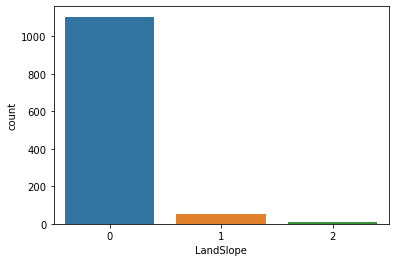

In [60]:
sns.countplot(x='LandSlope',data=df)
print(df['LandSlope'].value_counts())

0    277
1     14
2      1
Name: LandSlope, dtype: int64


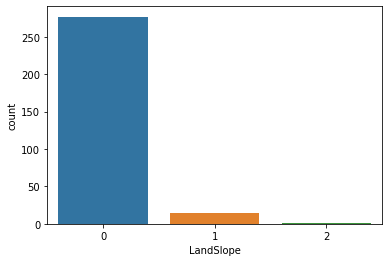

In [61]:
sns.countplot(x='LandSlope',data=df1)
print(df1['LandSlope'].value_counts())

<AxesSubplot:xlabel='Neighborhood', ylabel='Count'>

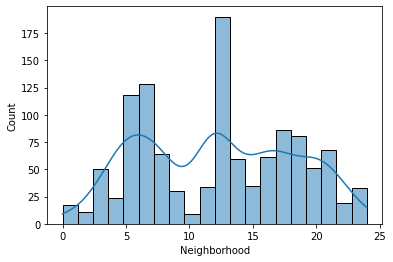

In [62]:
sns.histplot(x='Neighborhood',data=df,bins=20,kde=True)

<AxesSubplot:xlabel='Neighborhood', ylabel='Count'>

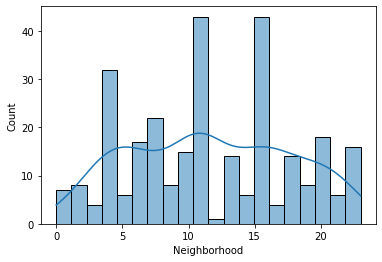

In [63]:
sns.histplot(x='Neighborhood',data=df1,bins=20,kde=True)

2    1005
1      67
0      38
6      20
4      17
5       9
3       6
8       4
7       2
Name: Condition1, dtype: int64


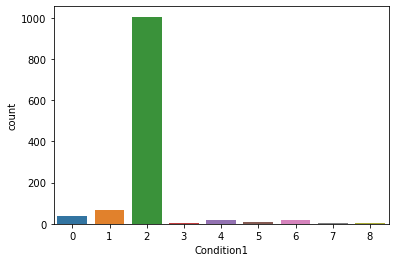

In [64]:
sns.countplot(x='Condition1',data=df)
print(df['Condition1'].value_counts())

2    255
1     14
0     10
6      6
5      2
4      2
3      2
7      1
Name: Condition1, dtype: int64


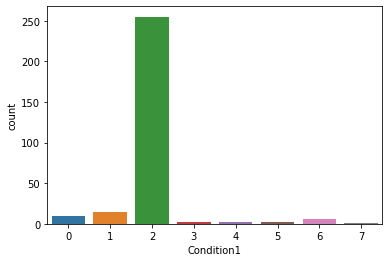

In [65]:
sns.countplot(x='Condition1',data=df1)
print(df1['Condition1'].value_counts())

2    1154
1       6
4       2
0       2
7       1
6       1
5       1
3       1
Name: Condition2, dtype: int64


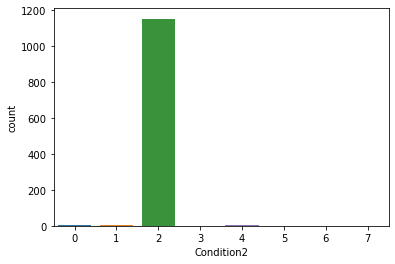

In [66]:
sns.countplot(x='Condition2',data=df)
print(df['Condition2'].value_counts())

0    291
1      1
Name: Condition2, dtype: int64


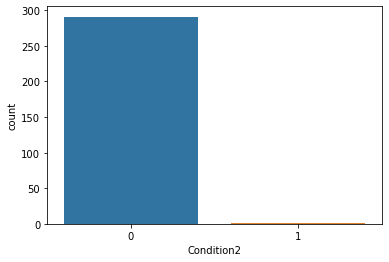

In [67]:
sns.countplot(x='Condition2',data=df1)
print(df1['Condition2'].value_counts())

0    981
4     90
2     41
3     29
1     27
Name: BldgType, dtype: int64


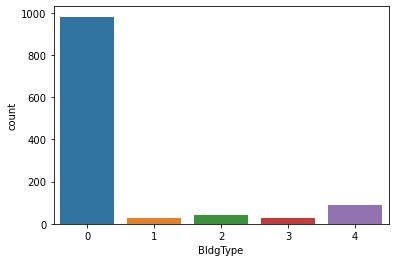

In [68]:
sns.countplot(x='BldgType',data=df)
print(df['BldgType'].value_counts())

0    239
4     24
3     14
2     11
1      4
Name: BldgType, dtype: int64


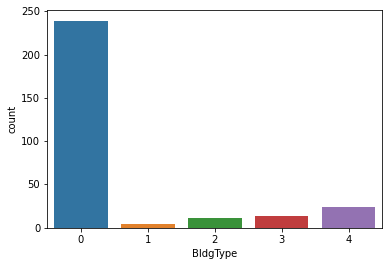

In [69]:
sns.countplot(x='BldgType',data=df1)
print(df1['BldgType'].value_counts())

2    578
5    361
0    121
7     47
6     32
1     12
4     10
3      7
Name: HouseStyle, dtype: int64


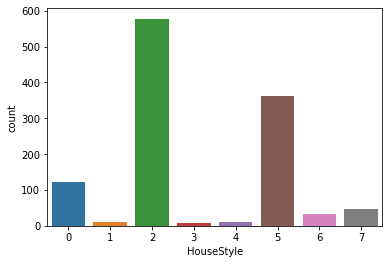

In [70]:
sns.countplot(x='HouseStyle',data=df)
print(df['HouseStyle'].value_counts())

2    148
5     84
0     33
7     18
6      5
1      2
4      1
3      1
Name: HouseStyle, dtype: int64


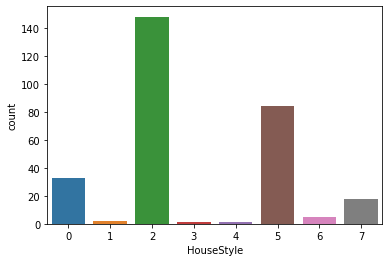

In [71]:
sns.countplot(x='HouseStyle',data=df1)
print(df1['HouseStyle'].value_counts())

5     314
6     295
7     260
8     138
4      93
9      32
3      16
10     15
2       3
1       2
Name: OverallQual, dtype: int64


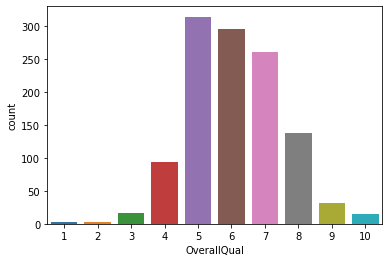

In [72]:
sns.countplot(x='OverallQual',data=df)
print(df['OverallQual'].value_counts())

5     83
6     79
7     59
8     30
4     23
9     11
3      4
10     3
Name: OverallQual, dtype: int64


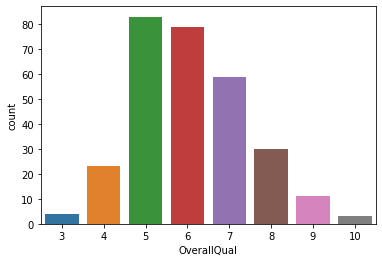

In [73]:
sns.countplot(x='OverallQual',data=df1)
print(df1['OverallQual'].value_counts())

5    640
6    209
7    172
8     61
4     43
3     21
9     16
2      5
1      1
Name: OverallCond, dtype: int64


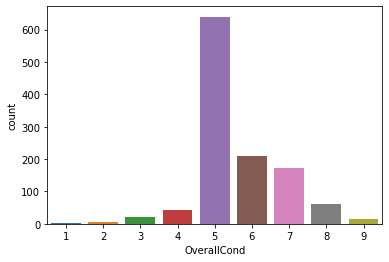

In [74]:
sns.countplot(x='OverallCond',data=df)
print(df['OverallCond'].value_counts())

5    181
6     43
7     33
4     14
8     11
9      6
3      4
Name: OverallCond, dtype: int64


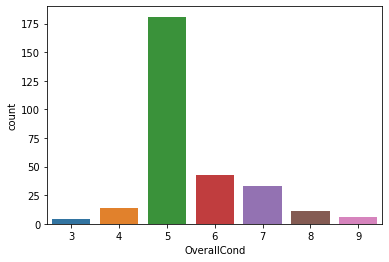

In [75]:
sns.countplot(x='OverallCond',data=df1)
print(df1['OverallCond'].value_counts())

<AxesSubplot:xlabel='YearBuilt', ylabel='Count'>

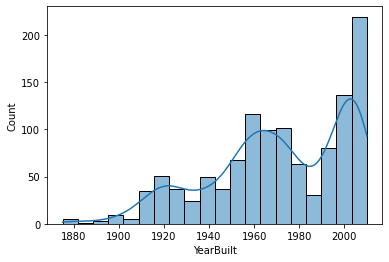

In [76]:
sns.histplot(x='YearBuilt',data=df,bins=20,kde=True)

<AxesSubplot:xlabel='YearBuilt', ylabel='Count'>

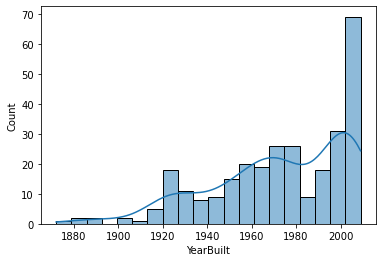

In [77]:
sns.histplot(x='YearBuilt',data=df1,bins=20,kde=True)

<AxesSubplot:xlabel='YearRemodAdd', ylabel='Count'>

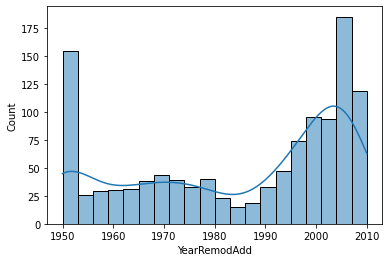

In [78]:
sns.histplot(x='YearRemodAdd',data=df,bins=20,kde=True)

<AxesSubplot:xlabel='YearRemodAdd', ylabel='Count'>

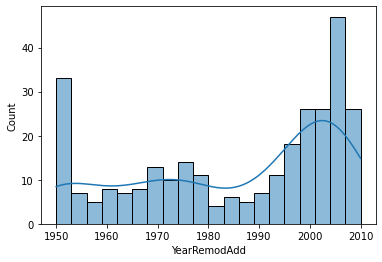

In [79]:
sns.histplot(x='YearRemodAdd',data=df1,bins=20,kde=True)

1    915
3    225
0     12
2      9
4      5
5      2
Name: RoofStyle, dtype: int64


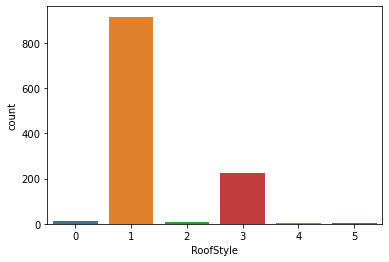

In [80]:
sns.countplot(x='RoofStyle',data=df)
print(df['RoofStyle'].value_counts())

1    226
3     61
4      2
2      2
0      1
Name: RoofStyle, dtype: int64


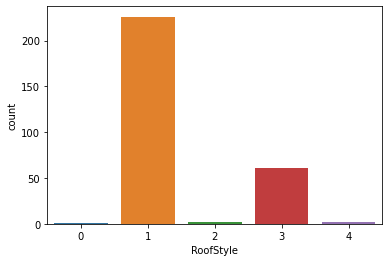

In [81]:
sns.countplot(x='RoofStyle',data=df1)
print(df1['RoofStyle'].value_counts())

1    1144
5      10
7       6
6       4
4       1
3       1
2       1
0       1
Name: RoofMatl, dtype: int64


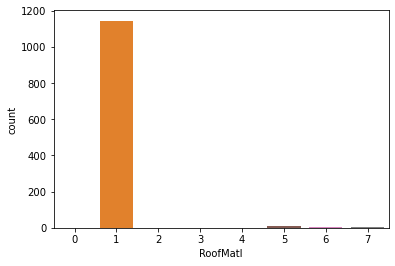

In [82]:
sns.countplot(x='RoofMatl',data=df)
print(df['RoofMatl'].value_counts())

11    396
5     179
7     178
12    174
8      93
4      42
3      41
10     22
13     19
0      19
9       2
6       1
2       1
1       1
Name: Exterior1st, dtype: int64


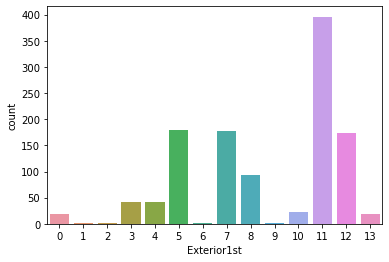

In [83]:
sns.countplot(x='Exterior1st',data=df)
print(df['Exterior1st'].value_counts())

9     119
5      43
6      42
10     32
4      19
7      15
2       9
11      7
8       3
3       1
1       1
0       1
Name: Exterior1st, dtype: int64


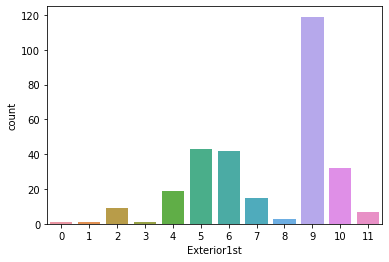

In [84]:
sns.countplot(x='Exterior1st',data=df1)
print(df1['Exterior1st'].value_counts())

12    387
7     173
5     170
13    165
9     118
4      42
14     31
11     23
3      20
0      18
6       8
2       5
10      4
1       3
8       1
Name: Exterior2nd, dtype: int64


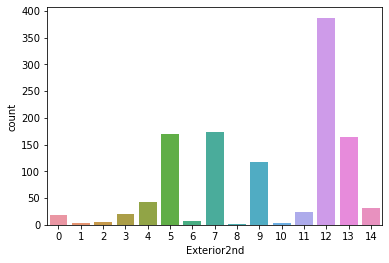

In [85]:
sns.countplot(x='Exterior2nd',data=df)
print(df['Exterior2nd'].value_counts())

11    117
7      41
5      37
12     32
8      24
4      18
13      7
2       5
10      3
6       2
1       2
0       2
9       1
3       1
Name: Exterior2nd, dtype: int64


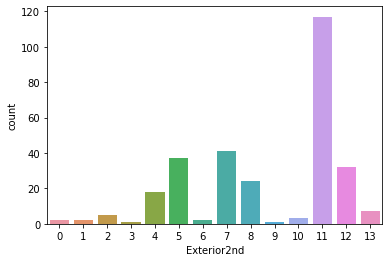

In [86]:
sns.countplot(x='Exterior2nd',data=df1)
print(df1['Exterior2nd'].value_counts())

2    696
1    354
3     98
0     13
4      7
Name: MasVnrType, dtype: int64


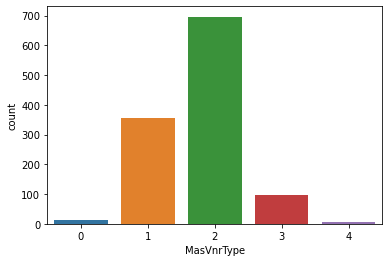

In [87]:
sns.countplot(x='MasVnrType',data=df)
print(df['MasVnrType'].value_counts())

2    168
1     91
3     30
0      2
4      1
Name: MasVnrType, dtype: int64


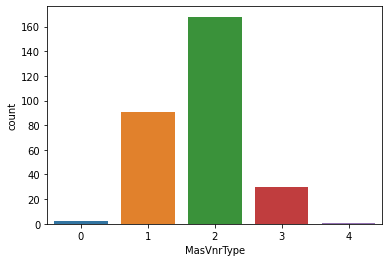

In [88]:
sns.countplot(x='MasVnrType',data=df1)
print(df1['MasVnrType'].value_counts())

<AxesSubplot:xlabel='MasVnrArea', ylabel='Count'>

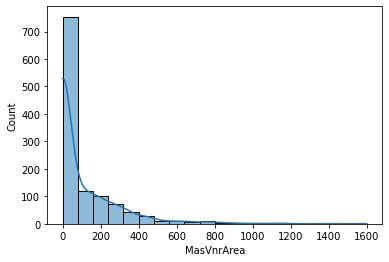

In [89]:
sns.histplot(x='MasVnrArea',data=df,bins=20,kde=True)

<AxesSubplot:xlabel='MasVnrArea', ylabel='Count'>

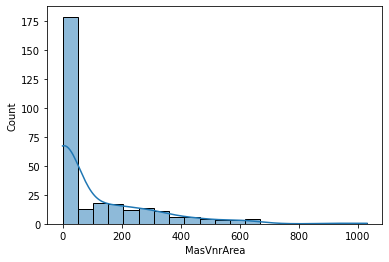

In [90]:
sns.histplot(x='MasVnrArea',data=df1,bins=20,kde=True)

3    717
2    397
0     43
1     11
Name: ExterQual, dtype: int64


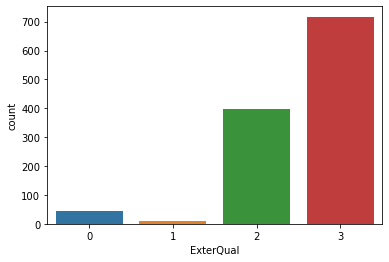

In [91]:
sns.countplot(x='ExterQual',data=df)
print(df['ExterQual'].value_counts())

3    189
2     91
0      9
1      3
Name: ExterQual, dtype: int64


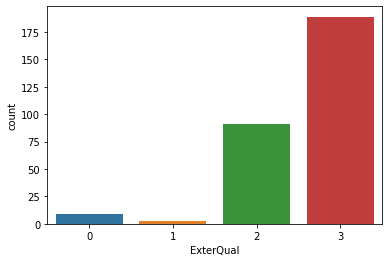

In [92]:
sns.countplot(x='ExterQual',data=df1)
print(df1['ExterQual'].value_counts())

4    1022
2     117
1      26
0       2
3       1
Name: ExterCond, dtype: int64


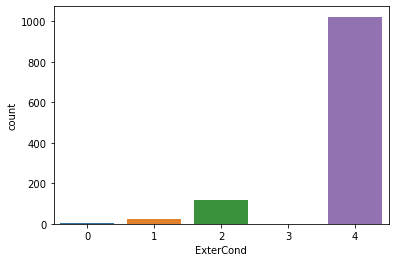

In [93]:
sns.countplot(x='ExterCond',data=df)
print(df['ExterCond'].value_counts())

3    260
2     29
1      2
0      1
Name: ExterCond, dtype: int64


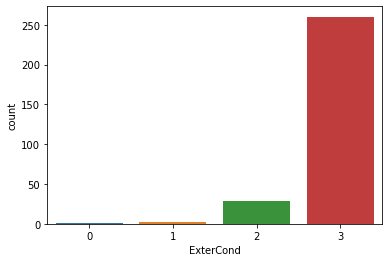

In [94]:
sns.countplot(x='ExterCond',data=df1)
print(df1['ExterCond'].value_counts())

1    516
2    513
0    112
3     21
4      5
5      1
Name: Foundation, dtype: int64


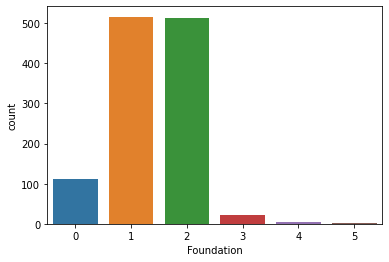

In [95]:
sns.countplot(x='Foundation',data=df)
print(df['Foundation'].value_counts())

2    134
1    118
0     34
3      3
5      2
4      1
Name: Foundation, dtype: int64


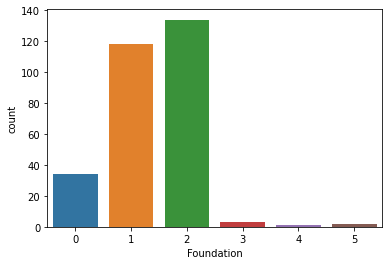

In [96]:
sns.countplot(x='Foundation',data=df1)
print(df1['Foundation'].value_counts())

3    517
2    498
0     94
4     30
1     29
Name: BsmtQual, dtype: int64


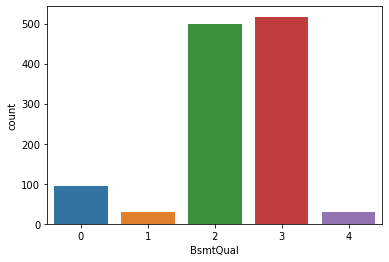

In [97]:
sns.countplot(x='BsmtQual',data=df)
print(df['BsmtQual'].value_counts())

3    132
2    120
0     27
4      7
1      6
Name: BsmtQual, dtype: int64


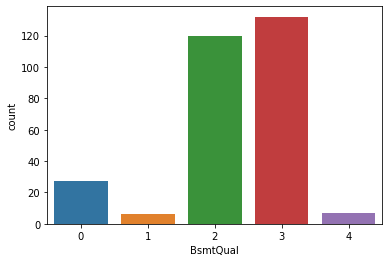

In [98]:
sns.countplot(x='BsmtQual',data=df1)
print(df1['BsmtQual'].value_counts())

3    1041
1      56
0      39
4      30
2       2
Name: BsmtCond, dtype: int64


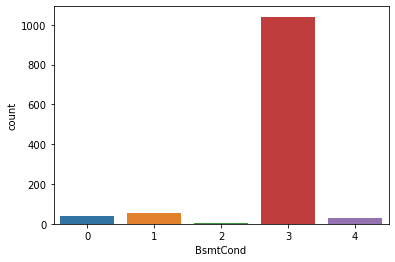

In [99]:
sns.countplot(x='BsmtCond',data=df)
print(df['BsmtCond'].value_counts())

2    270
1      9
3      7
0      6
Name: BsmtCond, dtype: int64


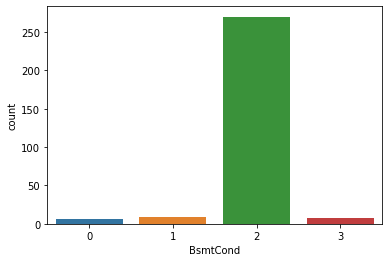

In [100]:
sns.countplot(x='BsmtCond',data=df1)
print(df1['BsmtCond'].value_counts())

3    756
0    180
1    108
2     93
4     31
Name: BsmtExposure, dtype: int64


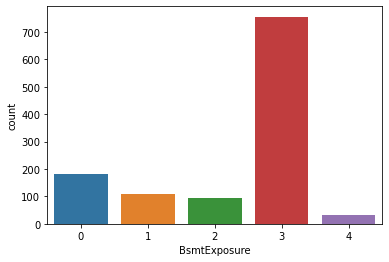

In [101]:
sns.countplot(x='BsmtExposure',data=df)
print(df['BsmtExposure'].value_counts())

3    197
0     41
1     26
2     21
4      7
Name: BsmtExposure, dtype: int64


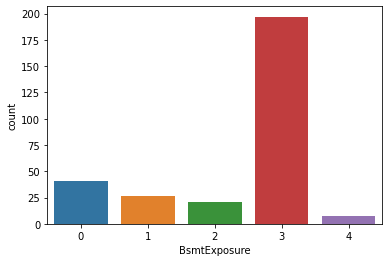

In [102]:
sns.countplot(x='BsmtExposure',data=df1)
print(df1['BsmtExposure'].value_counts())

5    345
2    330
0    174
1    121
4    109
3     59
6     30
Name: BsmtFinType1, dtype: int64


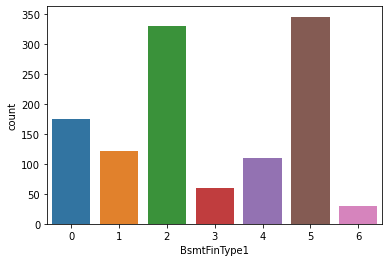

In [103]:
sns.countplot(x='BsmtFinType1',data=df)
print(df['BsmtFinType1'].value_counts())

2    88
5    85
0    46
1    27
4    24
3    15
6     7
Name: BsmtFinType1, dtype: int64


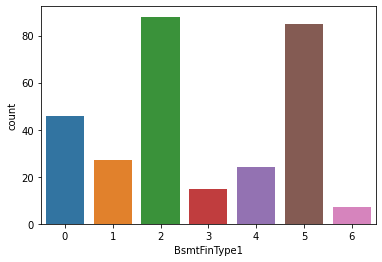

In [104]:
sns.countplot(x='BsmtFinType1',data=df1)
print(df1['BsmtFinType1'].value_counts())

<AxesSubplot:xlabel='BsmtFinSF1', ylabel='Count'>

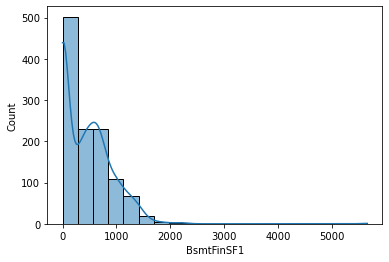

In [105]:
sns.histplot(x='BsmtFinSF1',data=df,bins=20,kde=True)

<AxesSubplot:xlabel='BsmtFinSF1', ylabel='Count'>

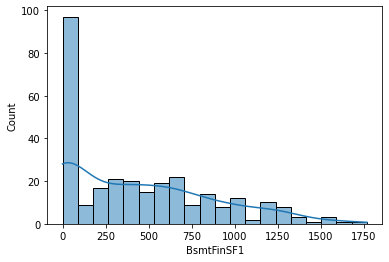

In [106]:
sns.histplot(x='BsmtFinSF1',data=df1,bins=20,kde=True)

5    1002
4      43
3      40
6      31
1      24
0      16
2      12
Name: BsmtFinType2, dtype: int64


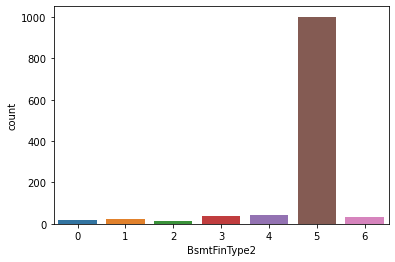

In [107]:
sns.countplot(x='BsmtFinType2',data=df)
print(df['BsmtFinType2'].value_counts())

5    254
4     11
1      9
6      7
3      6
0      3
2      2
Name: BsmtFinType2, dtype: int64


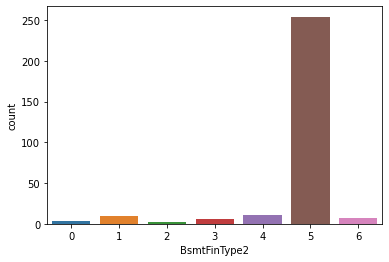

In [108]:
sns.countplot(x='BsmtFinType2',data=df1)
print(df1['BsmtFinType2'].value_counts())

<AxesSubplot:xlabel='BsmtFinSF2', ylabel='Count'>

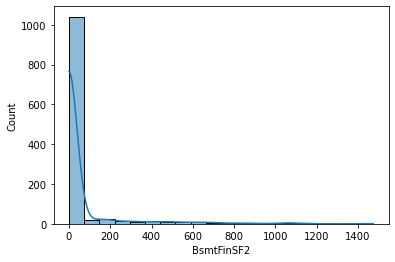

In [109]:
sns.histplot(x='BsmtFinSF2',data=df,bins=20,kde=True)

<AxesSubplot:xlabel='BsmtFinSF2', ylabel='Count'>

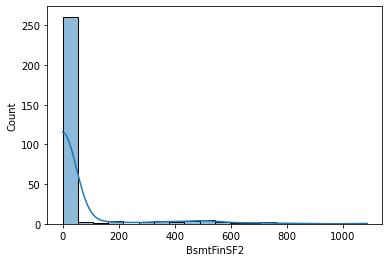

In [110]:
sns.histplot(x='BsmtFinSF2',data=df1,bins=20,kde=True)

<AxesSubplot:xlabel='BsmtUnfSF', ylabel='Count'>

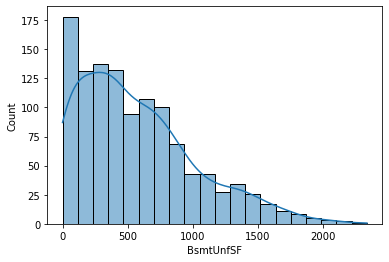

In [111]:
sns.histplot(x='BsmtUnfSF',data=df,bins=20,kde=True)

<AxesSubplot:xlabel='BsmtUnfSF', ylabel='Count'>

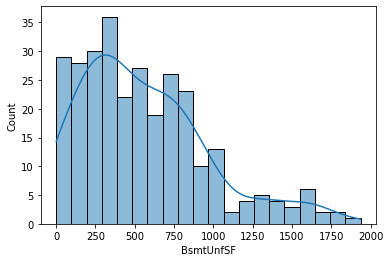

In [112]:
sns.histplot(x='BsmtUnfSF',data=df1,bins=20,kde=True)

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='Count'>

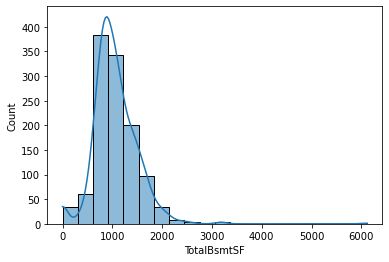

In [113]:
sns.histplot(x='TotalBsmtSF',data=df,bins=20,kde=True)

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='Count'>

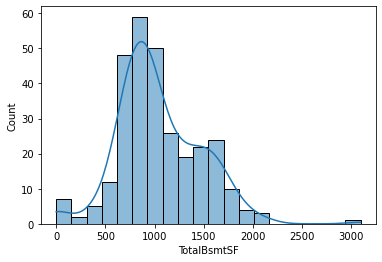

In [114]:
sns.histplot(x='TotalBsmtSF',data=df1,bins=20,kde=True)

1    1143
2      14
3       5
5       4
4       1
0       1
Name: Heating, dtype: int64


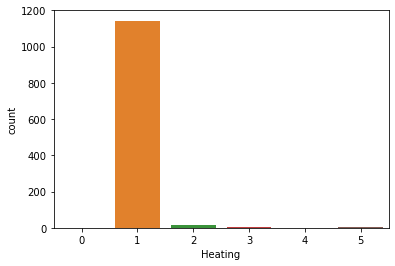

In [115]:
sns.countplot(x='Heating',data=df)
print(df['Heating'].value_counts())

0    285
1      4
2      2
3      1
Name: Heating, dtype: int64


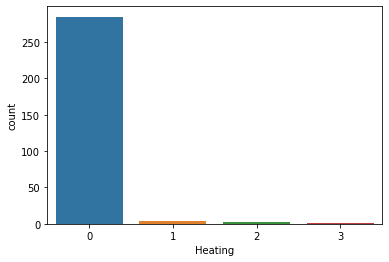

In [116]:
sns.countplot(x='Heating',data=df1)
print(df1['Heating'].value_counts())

0    585
4    352
2    192
1     38
3      1
Name: HeatingQC, dtype: int64


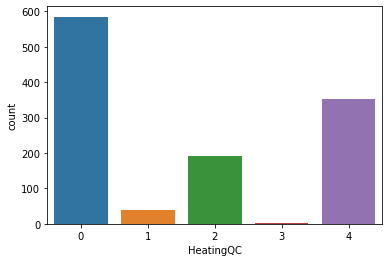

In [117]:
sns.countplot(x='HeatingQC',data=df)
print(df['HeatingQC'].value_counts())

0    156
3     76
2     49
1     11
Name: HeatingQC, dtype: int64


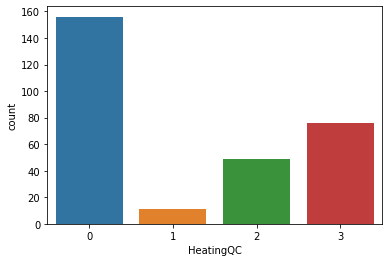

In [118]:
sns.countplot(x='HeatingQC',data=df1)
print(df1['HeatingQC'].value_counts())

1    1090
0      78
Name: CentralAir, dtype: int64


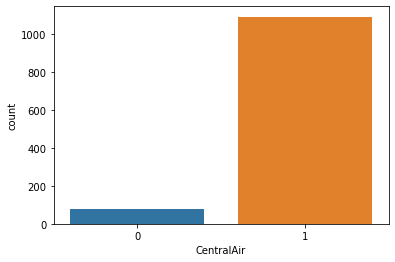

In [119]:
sns.countplot(x='CentralAir',data=df)
print(df['CentralAir'].value_counts())

1    275
0     17
Name: CentralAir, dtype: int64


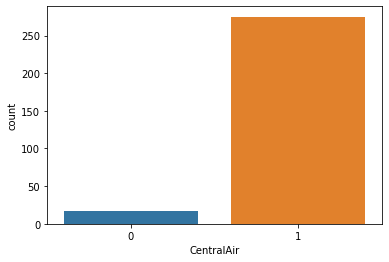

In [120]:
sns.countplot(x='CentralAir',data=df1)
print(df1['CentralAir'].value_counts())

4    1070
0      74
1      21
2       2
3       1
Name: Electrical, dtype: int64


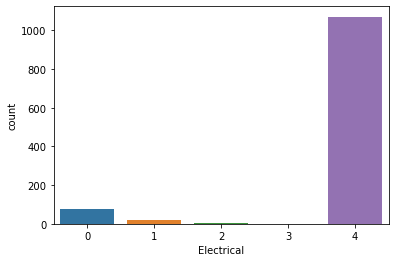

In [121]:
sns.countplot(x='Electrical',data=df)
print(df['Electrical'].value_counts())

3    264
0     20
1      6
4      1
2      1
Name: Electrical, dtype: int64


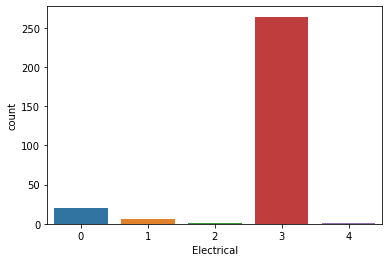

In [122]:
sns.countplot(x='Electrical',data=df1)
print(df1['Electrical'].value_counts())

<AxesSubplot:xlabel='1stFlrSF', ylabel='Count'>

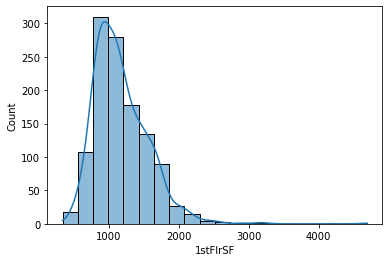

In [123]:
sns.histplot(x='1stFlrSF',data=df,bins=20,kde=True)

<AxesSubplot:xlabel='1stFlrSF', ylabel='Count'>

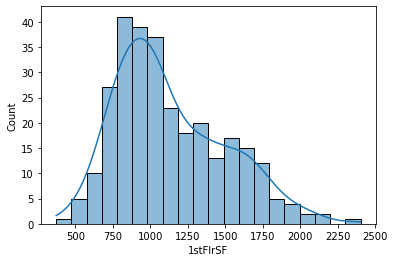

In [124]:
sns.histplot(x='1stFlrSF',data=df1,bins=20,kde=True)

<AxesSubplot:xlabel='2ndFlrSF', ylabel='Count'>

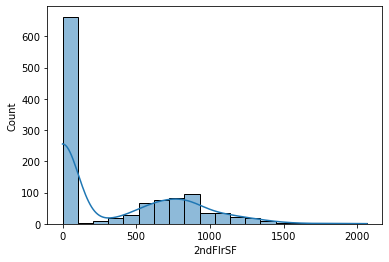

In [125]:
sns.histplot(x='2ndFlrSF',data=df,bins=20,kde=True)

<AxesSubplot:xlabel='2ndFlrSF', ylabel='Count'>

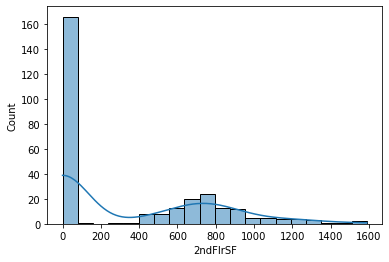

In [126]:
sns.histplot(x='2ndFlrSF',data=df1,bins=20,kde=True)

<AxesSubplot:xlabel='LowQualFinSF', ylabel='Count'>

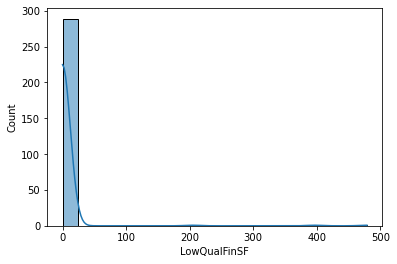

In [127]:
sns.histplot(x='LowQualFinSF',data=df1,bins=20,kde=True)

<AxesSubplot:xlabel='LowQualFinSF', ylabel='Count'>

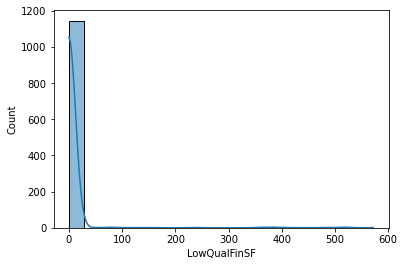

In [128]:
sns.histplot(x='LowQualFinSF',data=df,bins=20,kde=True)

<AxesSubplot:xlabel='GrLivArea', ylabel='Count'>

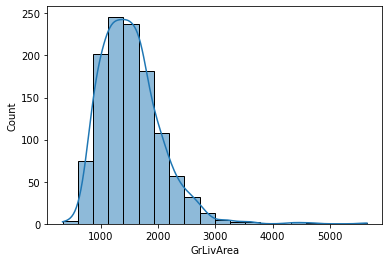

In [129]:
sns.histplot(x='GrLivArea',data=df,bins=20,kde=True)

<AxesSubplot:xlabel='GrLivArea', ylabel='Count'>

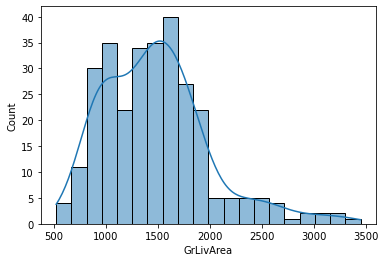

In [130]:
sns.histplot(x='GrLivArea',data=df1,bins=20,kde=True)

0    686
1    468
2     13
3      1
Name: BsmtFullBath, dtype: int64


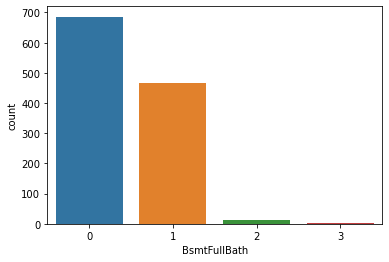

In [131]:
sns.countplot(x='BsmtFullBath',data=df)
print(df['BsmtFullBath'].value_counts())

0    686
1    468
2     13
3      1
Name: BsmtFullBath, dtype: int64


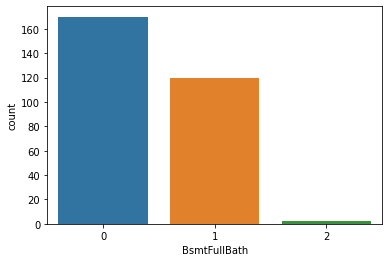

In [132]:
sns.countplot(x='BsmtFullBath',data=df1)
print(df['BsmtFullBath'].value_counts())

0    1105
1      61
2       2
Name: BsmtHalfBath, dtype: int64


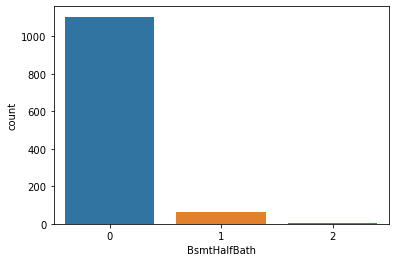

In [133]:
sns.countplot(x='BsmtHalfBath',data=df)
print(df['BsmtHalfBath'].value_counts())

0    273
1     19
Name: BsmtHalfBath, dtype: int64


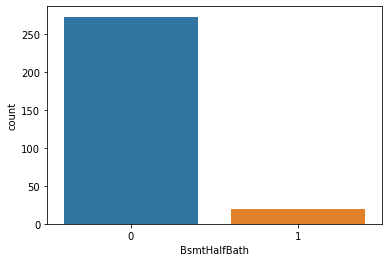

In [134]:
sns.countplot(x='BsmtHalfBath',data=df1)
print(df1['BsmtHalfBath'].value_counts())

2    610
1    524
3     27
0      7
Name: FullBath, dtype: int64


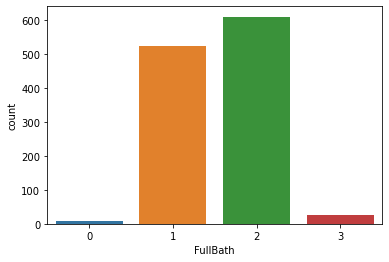

In [135]:
sns.countplot(x='FullBath',data=df)
print(df['FullBath'].value_counts())

2    158
1    126
3      6
0      2
Name: FullBath, dtype: int64


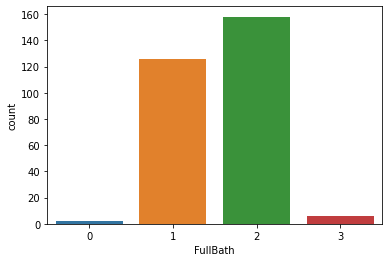

In [136]:
sns.countplot(x='FullBath',data=df1)
print(df1['FullBath'].value_counts())

0    724
1    434
2     10
Name: HalfBath, dtype: int64


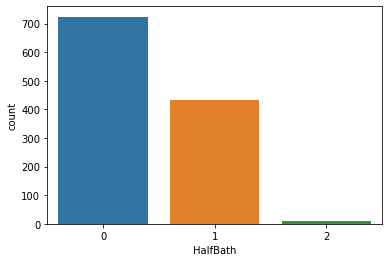

In [137]:
sns.countplot(x='HalfBath',data=df)
print(df['HalfBath'].value_counts())

0    189
1    101
2      2
Name: HalfBath, dtype: int64


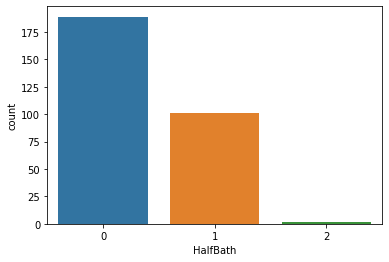

In [138]:
sns.countplot(x='HalfBath',data=df1)
print(df1['HalfBath'].value_counts())

3    640
2    281
4    180
1     39
5     18
6      5
0      4
8      1
Name: BedroomAbvGr, dtype: int64


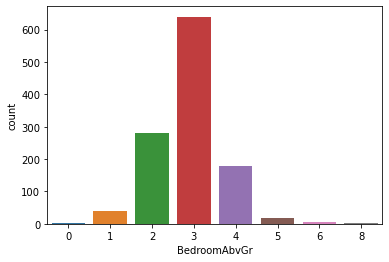

In [139]:
sns.countplot(x='BedroomAbvGr',data=df)
print(df['BedroomAbvGr'].value_counts())

3    164
2     77
4     33
1     11
5      3
6      2
0      2
Name: BedroomAbvGr, dtype: int64


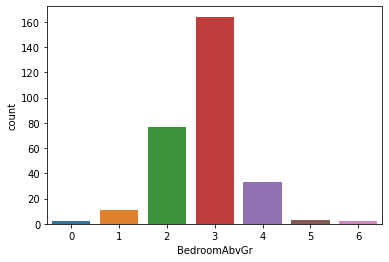

In [140]:
sns.countplot(x='BedroomAbvGr',data=df1)
print(df1['BedroomAbvGr'].value_counts())

1    1114
2      52
3       1
0       1
Name: KitchenAbvGr, dtype: int64


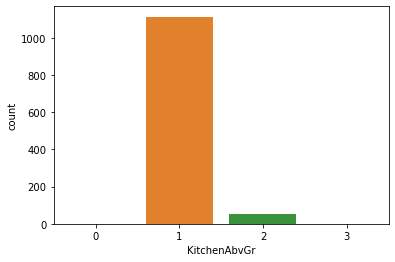

In [141]:
sns.countplot(x='KitchenAbvGr',data=df)
print(df['KitchenAbvGr'].value_counts())

1    278
2     13
3      1
Name: KitchenAbvGr, dtype: int64


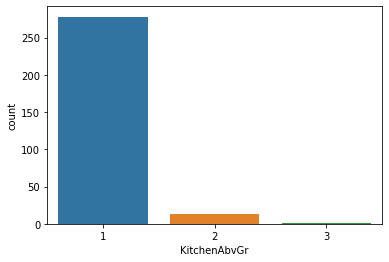

In [142]:
sns.countplot(x='KitchenAbvGr',data=df1)
print(df1['KitchenAbvGr'].value_counts())

3    578
2    478
0     82
1     30
Name: KitchenQual, dtype: int64


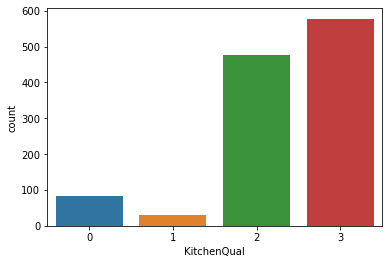

In [143]:
sns.countplot(x='KitchenQual',data=df)
print(df['KitchenQual'].value_counts())

3    157
2    108
0     18
1      9
Name: KitchenQual, dtype: int64


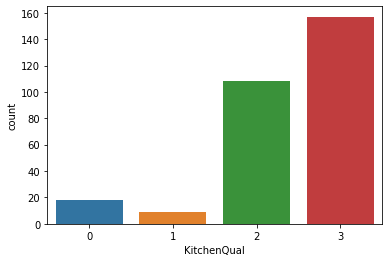

In [144]:
sns.countplot(x='KitchenQual',data=df1)
print(df1['KitchenQual'].value_counts())

6     325
7     268
5     217
8     148
4      72
9      65
10     41
11     13
3      11
12      6
14      1
2       1
Name: TotRmsAbvGrd, dtype: int64


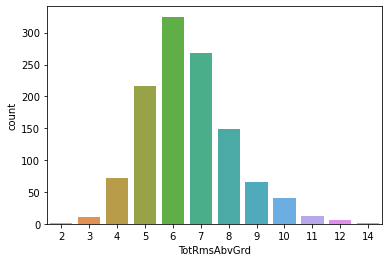

In [145]:
sns.countplot(x='TotRmsAbvGrd',data=df)
print(df['TotRmsAbvGrd'].value_counts())

6     77
7     61
5     58
8     39
4     25
9     10
10     6
3      6
12     5
11     5
Name: TotRmsAbvGrd, dtype: int64


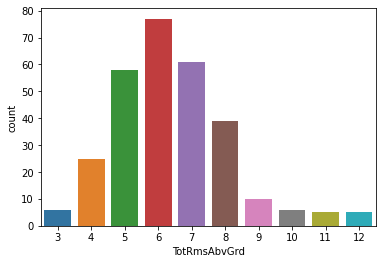

In [146]:
sns.countplot(x='TotRmsAbvGrd',data=df1)
print(df1['TotRmsAbvGrd'].value_counts())

6    1085
3      30
2      25
4      12
0      11
1       4
5       1
Name: Functional, dtype: int64


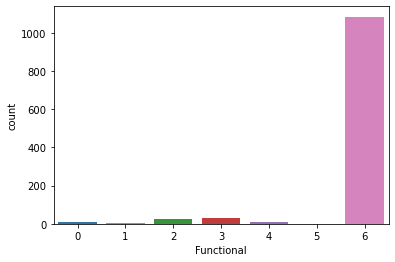

In [147]:
sns.countplot(x='Functional',data=df)
print(df['Functional'].value_counts())

5    275
2      6
3      4
4      3
0      3
1      1
Name: Functional, dtype: int64


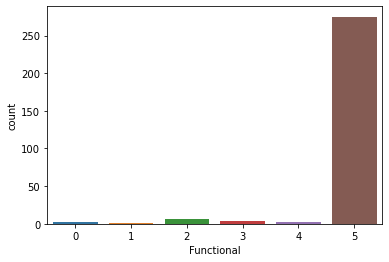

In [148]:
sns.countplot(x='Functional',data=df1)
print(df1['Functional'].value_counts())

0    551
1    518
2     94
3      5
Name: Fireplaces, dtype: int64


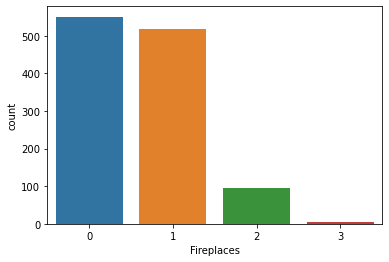

In [149]:
sns.countplot(x='Fireplaces',data=df)
print(df['Fireplaces'].value_counts())

0    139
1    132
2     21
Name: Fireplaces, dtype: int64


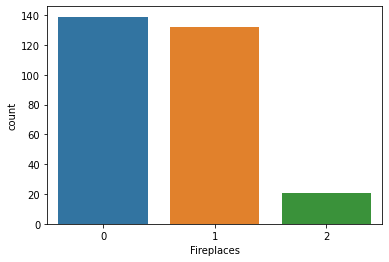

In [150]:
sns.countplot(x='Fireplaces',data=df1)
print(df1['Fireplaces'].value_counts())

5    551
2    301
4    252
1     25
0     21
3     18
Name: FireplaceQu, dtype: int64


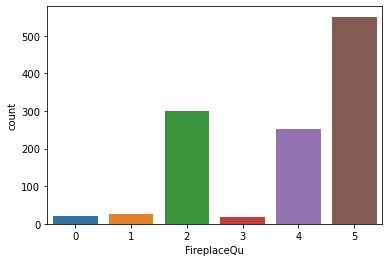

In [151]:
sns.countplot(x='FireplaceQu',data=df)
print(df['FireplaceQu'].value_counts())

5    139
2     79
4     61
1      8
0      3
3      2
Name: FireplaceQu, dtype: int64


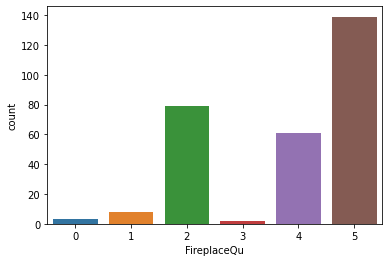

In [152]:
sns.countplot(x='FireplaceQu',data=df1)
print(df1['FireplaceQu'].value_counts())

1    691
5    314
3     70
6     64
2     16
4      8
0      5
Name: GarageType, dtype: int64


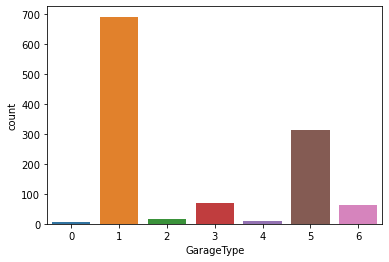

In [153]:
sns.countplot(x='GarageType',data=df)
print(df['GarageType'].value_counts())

1    691
5    314
3     70
6     64
2     16
4      8
0      5
Name: GarageType, dtype: int64


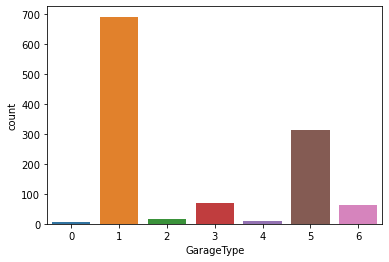

In [154]:
sns.countplot(x='GarageType',data=df)
print(df['GarageType'].value_counts())

<AxesSubplot:xlabel='GarageYrBlt', ylabel='Count'>

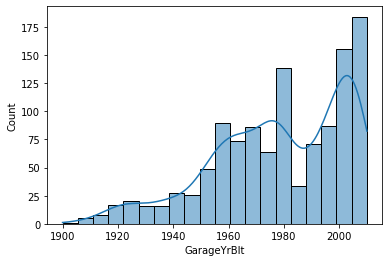

In [155]:
sns.histplot(x='GarageYrBlt',data=df,bins=20,kde=True)

<AxesSubplot:xlabel='GarageYrBlt', ylabel='Count'>

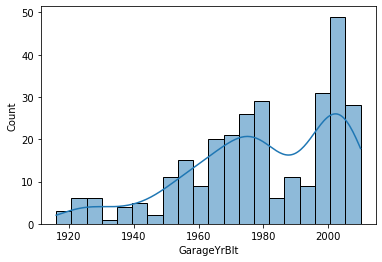

In [156]:
sns.histplot(x='GarageYrBlt',data=df1,bins=20,kde=True)

2    487
1    339
0    278
3     64
Name: GarageFinish, dtype: int64


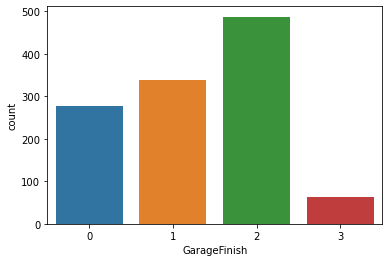

In [157]:
sns.countplot(x='GarageFinish',data=df)
print(df['GarageFinish'].value_counts())

2    118
1     83
0     74
3     17
Name: GarageFinish, dtype: int64


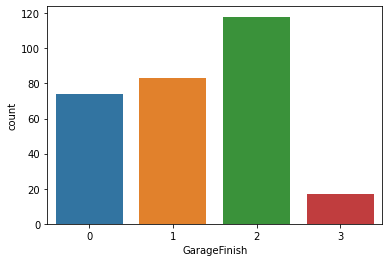

In [158]:
sns.countplot(x='GarageFinish',data=df1)
print(df1['GarageFinish'].value_counts())

2    665
1    288
3    147
0     64
4      4
Name: GarageCars, dtype: int64


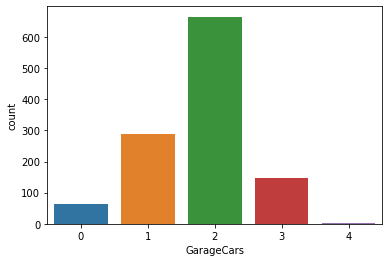

In [159]:
sns.countplot(x='GarageCars',data=df)
print(df['GarageCars'].value_counts())

2    159
1     81
3     34
0     17
4      1
Name: GarageCars, dtype: int64


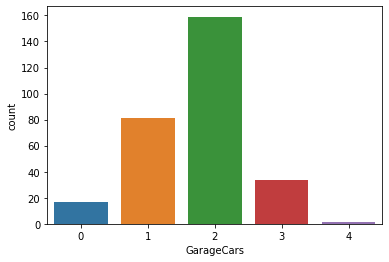

In [160]:
sns.countplot(x='GarageCars',data=df1)
print(df1['GarageCars'].value_counts())

<AxesSubplot:xlabel='GarageArea', ylabel='Count'>

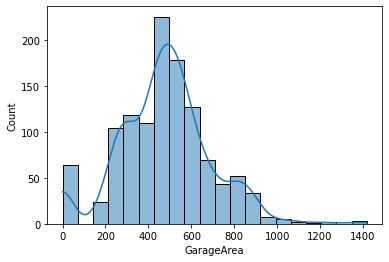

In [161]:
sns.histplot(x='GarageArea',data=df,bins=20,kde=True)

<AxesSubplot:xlabel='GarageArea', ylabel='Count'>

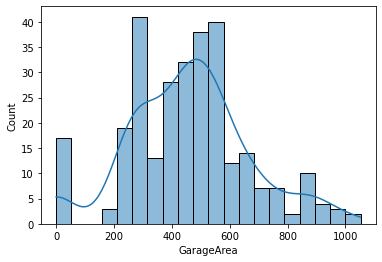

In [162]:
sns.histplot(x='GarageArea',data=df1,bins=20,kde=True)

4    1050
5      64
1      39
2      11
3       2
0       2
Name: GarageQual, dtype: int64


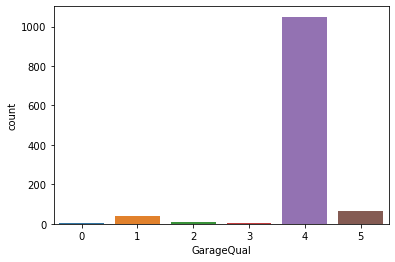

In [163]:
sns.countplot(x='GarageQual',data=df)
print(df['GarageQual'].value_counts())

4    261
5     17
1      9
2      3
3      1
0      1
Name: GarageQual, dtype: int64


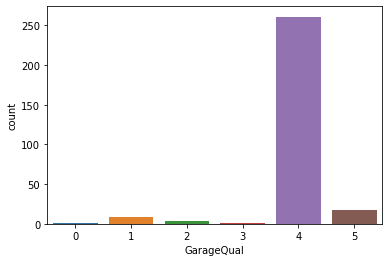

In [164]:
sns.countplot(x='GarageQual',data=df1)
print(df1['GarageQual'].value_counts())

4    1061
5      64
1      28
2       8
3       6
0       1
Name: GarageCond, dtype: int64


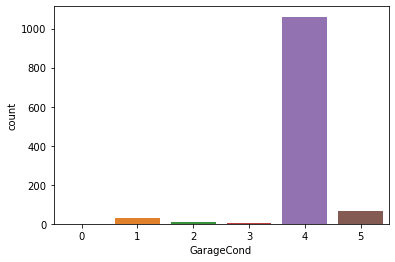

In [165]:
sns.countplot(x='GarageCond',data=df)
print(df['GarageCond'].value_counts())

4    265
5     17
1      7
3      1
2      1
0      1
Name: GarageCond, dtype: int64


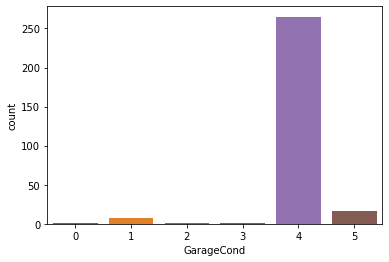

In [166]:
sns.countplot(x='GarageCond',data=df1)
print(df1['GarageCond'].value_counts())

2    1071
0      74
1      23
Name: PavedDrive, dtype: int64


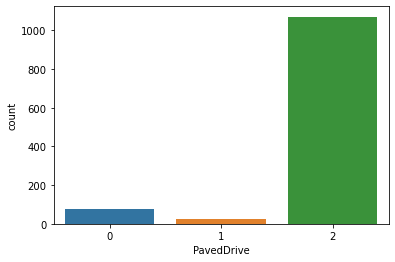

In [167]:
sns.countplot(x='PavedDrive',data=df)
print(df['PavedDrive'].value_counts())

2    269
0     16
1      7
Name: PavedDrive, dtype: int64


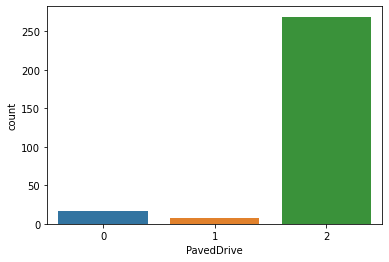

In [168]:
sns.countplot(x='PavedDrive',data=df1)
print(df1['PavedDrive'].value_counts())

<AxesSubplot:xlabel='WoodDeckSF', ylabel='Count'>

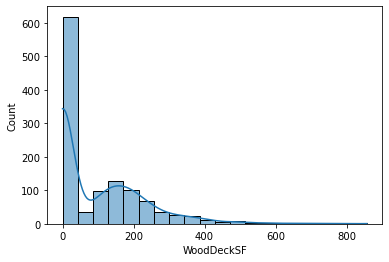

In [169]:
sns.histplot(x='WoodDeckSF',data=df,bins=20,kde=True)

<AxesSubplot:xlabel='WoodDeckSF', ylabel='Count'>

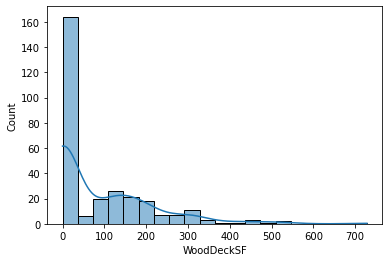

In [170]:
sns.histplot(x='WoodDeckSF',data=df1,bins=20,kde=True)

<AxesSubplot:xlabel='OpenPorchSF', ylabel='Count'>

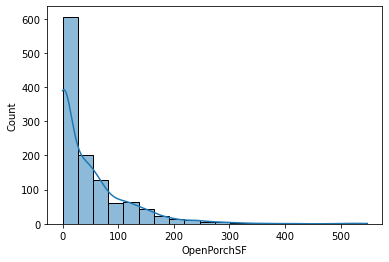

In [171]:
sns.histplot(x='OpenPorchSF',data=df,bins=20,kde=True)

<AxesSubplot:xlabel='OpenPorchSF', ylabel='Count'>

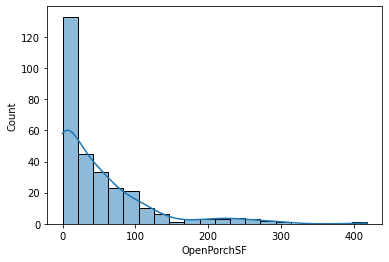

In [172]:
sns.histplot(x='OpenPorchSF',data=df1,bins=20,kde=True)

<AxesSubplot:xlabel='EnclosedPorch', ylabel='Count'>

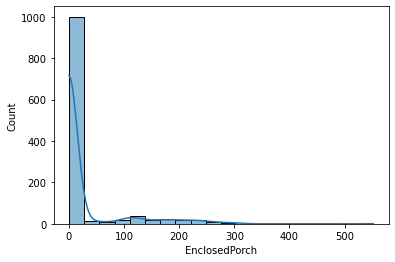

In [173]:
sns.histplot(x='EnclosedPorch',data=df,bins=20,kde=True)

<AxesSubplot:xlabel='EnclosedPorch', ylabel='Count'>

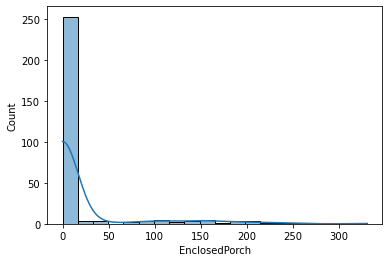

In [174]:
sns.histplot(x='EnclosedPorch',data=df1,bins=20,kde=True)

<AxesSubplot:xlabel='3SsnPorch', ylabel='Count'>

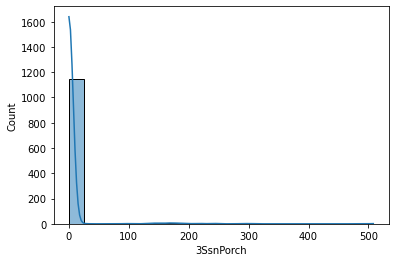

In [175]:
sns.histplot(x='3SsnPorch',data=df,bins=20,kde=True)

<AxesSubplot:xlabel='3SsnPorch', ylabel='Count'>

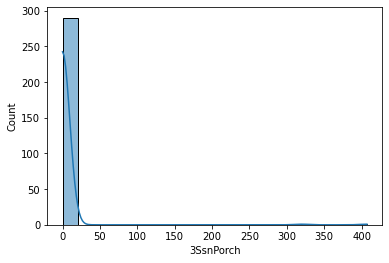

In [176]:
sns.histplot(x='3SsnPorch',data=df1,bins=20,kde=True)

<AxesSubplot:xlabel='ScreenPorch', ylabel='Count'>

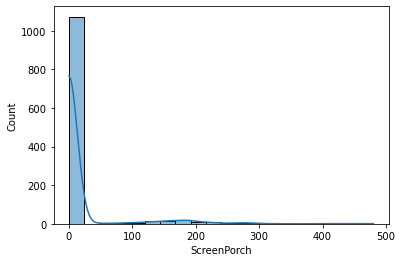

In [177]:
sns.histplot(x='ScreenPorch',data=df,bins=20,kde=True)

<AxesSubplot:xlabel='ScreenPorch', ylabel='Count'>

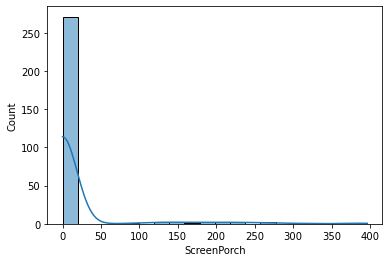

In [178]:
sns.histplot(x='ScreenPorch',data=df1,bins=20,kde=True)

<AxesSubplot:xlabel='PoolArea', ylabel='Count'>

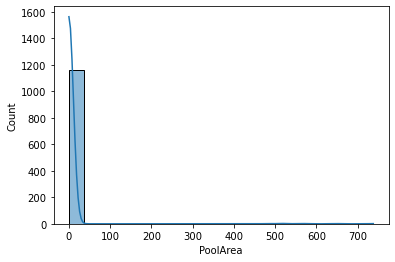

In [179]:
sns.histplot(x='PoolArea',data=df,bins=20,kde=True)

0      1161
738       1
648       1
576       1
555       1
519       1
512       1
480       1
Name: PoolArea, dtype: int64


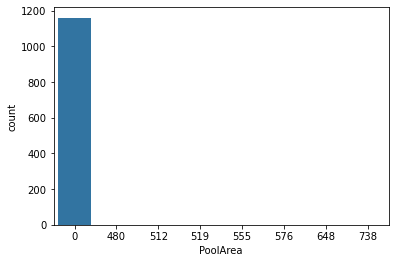

In [180]:
sns.countplot(x='PoolArea',data=df)
print(df['PoolArea'].value_counts())

4    931
2    129
0     51
1     47
3     10
Name: Fence, dtype: int64


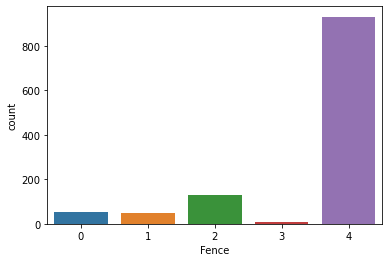

In [181]:
sns.countplot(x='Fence',data=df)
print(df['Fence'].value_counts())

4    248
2     28
0      8
1      7
3      1
Name: Fence, dtype: int64


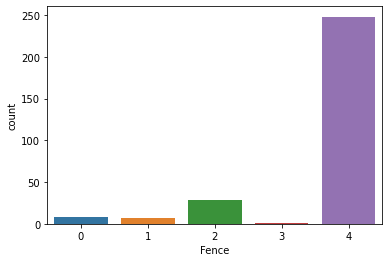

In [182]:
sns.countplot(x='Fence',data=df1)
print(df1['Fence'].value_counts())

4    1124
2      40
0       2
3       1
1       1
Name: MiscFeature, dtype: int64


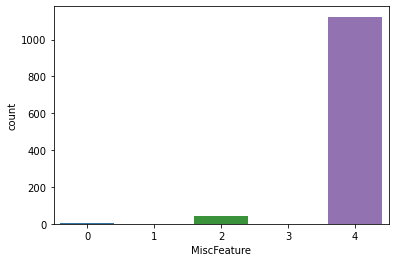

In [183]:
sns.countplot(x='MiscFeature',data=df)
print(df['MiscFeature'].value_counts())

2    282
1      9
0      1
Name: MiscFeature, dtype: int64


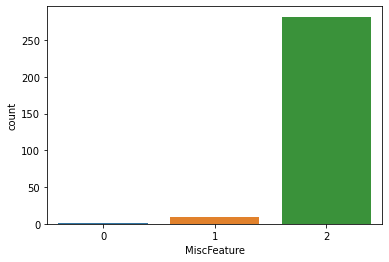

In [184]:
sns.countplot(x='MiscFeature',data=df1)
print(df1['MiscFeature'].value_counts())

<AxesSubplot:xlabel='MiscVal', ylabel='Count'>

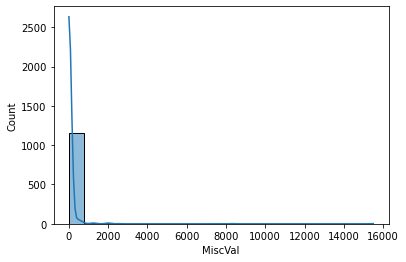

In [185]:
sns.histplot(x='MiscVal',data=df,bins=20,kde=True)

<AxesSubplot:xlabel='MiscVal', ylabel='Count'>

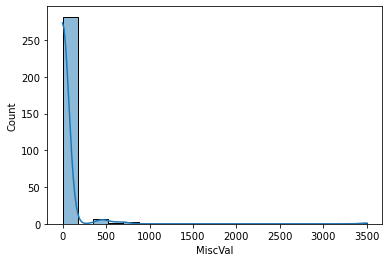

In [186]:
sns.histplot(x='MiscVal',data=df1,bins=20,kde=True)

6     203
7     187
5     166
4     113
8      95
3      87
11     67
10     66
9      57
12     46
1      44
2      37
Name: MoSold, dtype: int64


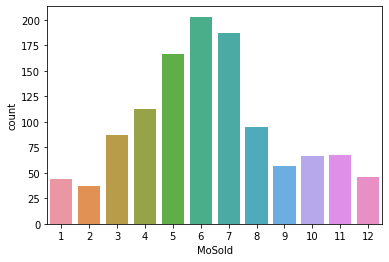

In [187]:
sns.countplot(x='MoSold',data=df)
print(df['MoSold'].value_counts())

6     50
7     47
5     38
4     28
8     27
10    23
3     19
2     15
1     14
12    13
11    12
9      6
Name: MoSold, dtype: int64


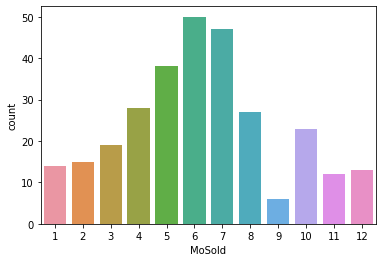

In [188]:
sns.countplot(x='MoSold',data=df1)
print(df1['MoSold'].value_counts())

2007    264
2009    260
2006    254
2008    248
2010    142
Name: YrSold, dtype: int64


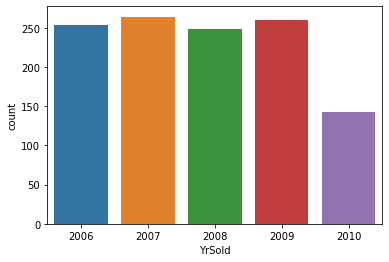

In [189]:
sns.countplot(x='YrSold',data=df)
print(df['YrSold'].value_counts())

2009    78
2007    65
2006    60
2008    56
2010    33
Name: YrSold, dtype: int64


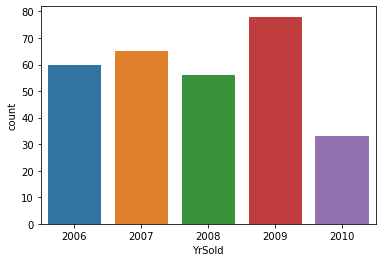

In [190]:
sns.countplot(x='YrSold',data=df1)
print(df1['YrSold'].value_counts())

8    999
6    106
0     38
3      8
4      5
5      4
7      3
1      3
2      2
Name: SaleType, dtype: int64


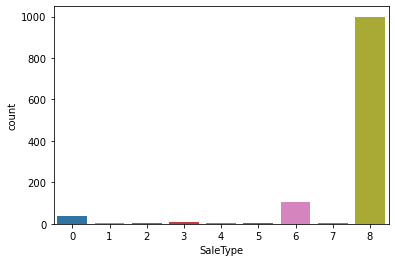

In [191]:
sns.countplot(x='SaleType',data=df)
print(df['SaleType'].value_counts())

5    268
4     16
0      5
3      1
2      1
1      1
Name: SaleType, dtype: int64


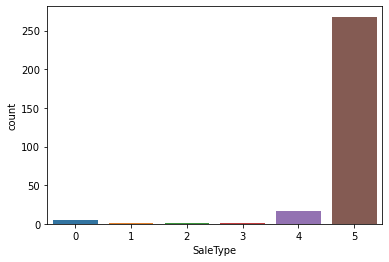

In [192]:
sns.countplot(x='SaleType',data=df1)
print(df1['SaleType'].value_counts())

4    945
5    108
0     81
3     18
2     12
1      4
Name: SaleCondition, dtype: int64


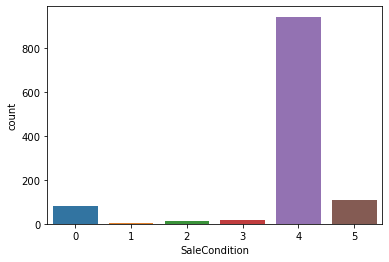

In [193]:
sns.countplot(x='SaleCondition',data=df)
print(df['SaleCondition'].value_counts())

2    253
0     20
3     17
1      2
Name: SaleCondition, dtype: int64


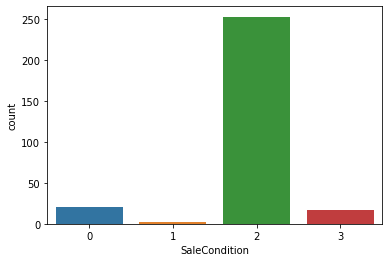

In [194]:
sns.countplot(x='SaleCondition',data=df1)
print(df1['SaleCondition'].value_counts())

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

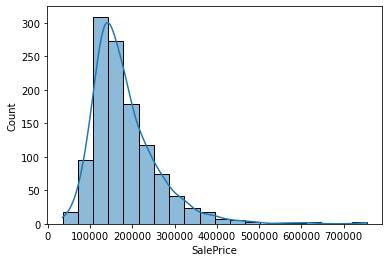

In [195]:
sns.histplot(x='SalePrice',data=df,bins=20,kde=True)

# Describing DataSet

In [196]:
df.describe()

Id   MSSubClass     MSZoning  LotFrontage        LotArea  \
count  1168.000000  1168.000000  1168.000000  1168.000000    1168.000000   
mean    724.136130    56.767979     3.013699    70.988470   10484.749144   
std     416.159877    41.940650     0.633120    22.437056    8957.442311   
min       1.000000    20.000000     0.000000    21.000000    1300.000000   
25%     360.500000    20.000000     3.000000    60.000000    7621.500000   
50%     714.500000    50.000000     3.000000    70.988470    9522.500000   
75%    1079.500000    70.000000     3.000000    79.250000   11515.500000   
max    1460.000000   190.000000     4.000000   313.000000  164660.000000   

            Street        Alley     LotShape  LandContour  Utilities  ...  \
count  1168.000000  1168.000000  1168.000000  1168.000000     1168.0  ...   
mean      0.996575     1.898973     1.938356     2.773973        0.0  ...   
std       0.058445     0.401453     1.412262     0.710027        0.0  ...   
min       0.000000     0.000000     0.000000     0.000000        0.0  ...   
25%       1.000000     2.000000     0.000000     3.000000        0.0  ...   
50%       1.000000     2.000000     3.000000     3.000000        0.0  ...   
75%       1.000000     2.000000     3.000000     3.000000        0.0  ...   
max       1.000000     2.000000     3.000000     3.000000        0.0  ...   

          PoolArea       PoolQC        Fence  MiscFeature       MiscVal  \
count  1168.000000  1168.000000  1168.000000  1168.000000   1168.000000   
mean      3.448630     2.988870     3.475171     3.921233     47.315068   
std      44.896939     0.157245     1.112090     0.408514    543.264432   
min       0.000000     0.000000     0.000000     0.000000      0.000000   
25%       0.000000     3.000000     4.000000     4.000000      0.000000   
50%       0.000000     3.000000     4.000000     4.000000      0.000000   
75%       0.000000     3.000000     4.000000     4.000000      0.000000   
max     738.000000     3.000000     4.000000     4.000000  15500.000000   

            MoSold       YrSold     SaleType  SaleCondition      SalePrice  
count  1168.000000  1168.000000  1168.000000    1168.000000    1168.000000  
mean      6.344178  2007.804795     7.465753       3.768836  181477.005993  
std       2.686352     1.329738     1.619459       1.112208   79105.586863  
min       1.000000  2006.000000     0.000000       0.000000   34900.000000  
25%       5.000000  2007.000000     8.000000       4.000000  130375.000000  
50%       6.000000  2008.000000     8.000000       4.000000  163995.000000  
75%       8.000000  2009.000000     8.000000       4.000000  215000.000000  
max      12.000000  2010.000000     8.000000       5.000000  755000.000000  

[8 rows x 81 columns]

In [197]:
import matplotlib.pyplot as plt

<AxesSubplot:>

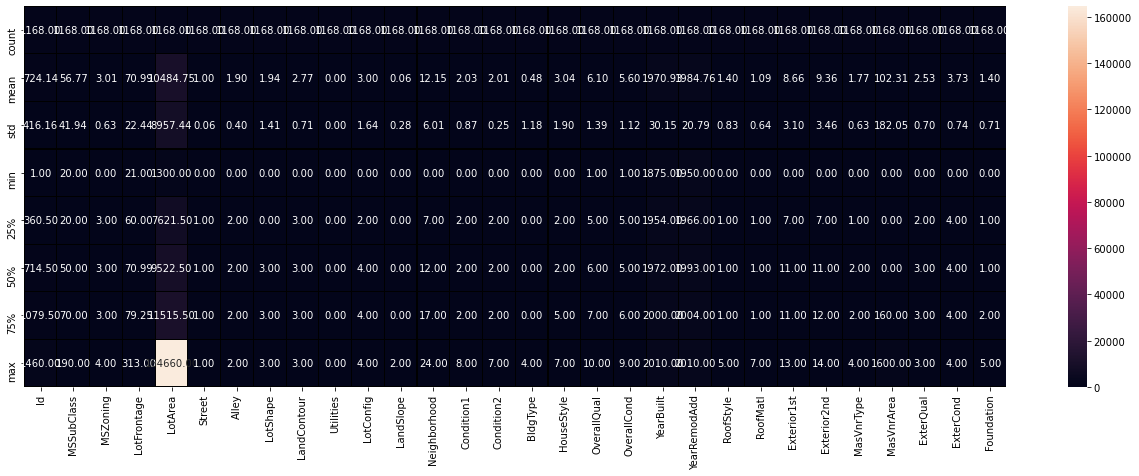

In [201]:
plt.figure(figsize=(22,7))
sns.heatmap(df.iloc[:,:30].describe(),annot=True,linecolor='black',linewidths=0.1,fmt='0.2f')

<AxesSubplot:>

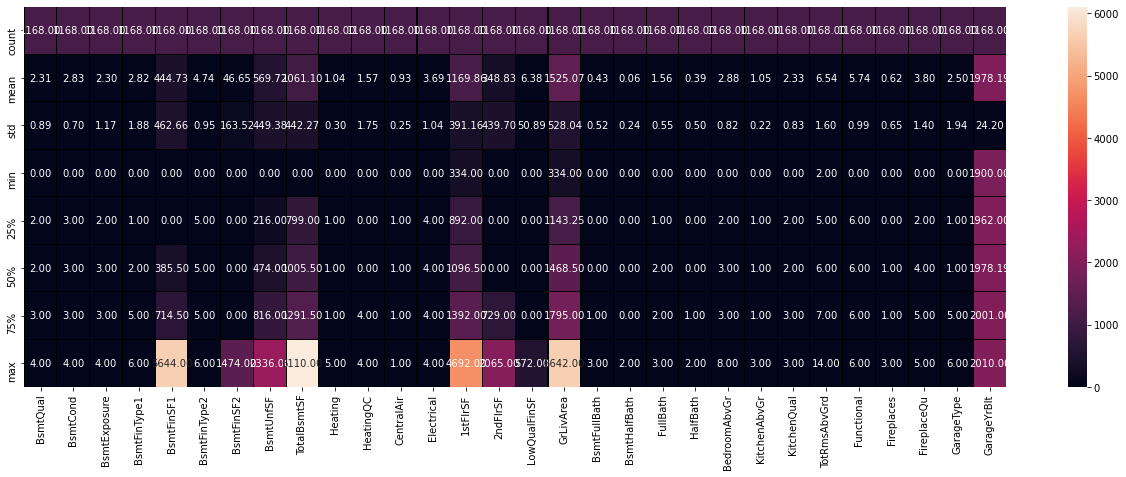

In [202]:
plt.figure(figsize=(22,7))
sns.heatmap(df.iloc[:,30:60].describe(),annot=True,linecolor='black',linewidths=0.1,fmt='0.2f')

<AxesSubplot:>

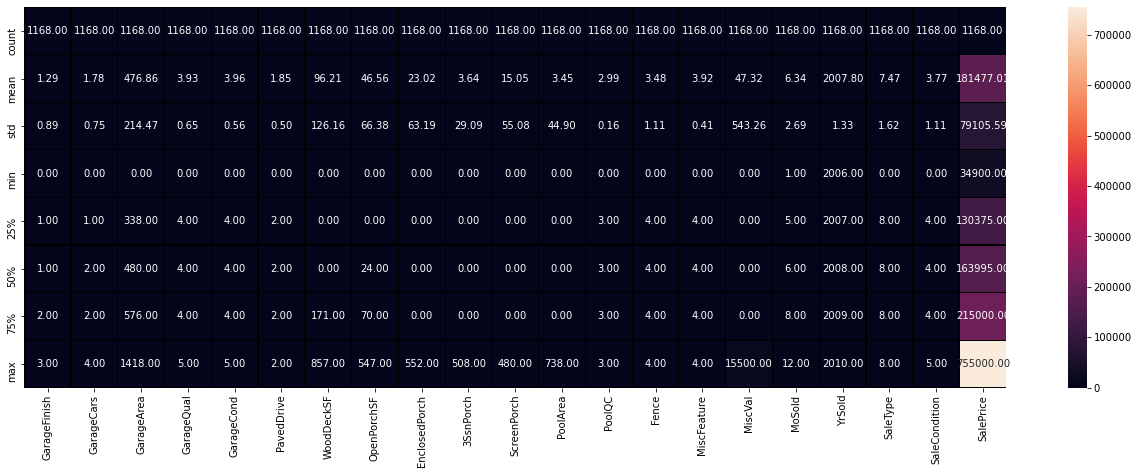

In [203]:
plt.figure(figsize=(22,7))
sns.heatmap(df.iloc[:,60:81].describe(),annot=True,linecolor='black',linewidths=0.1,fmt='0.2f')

In [204]:
df.corr()

Id  MSSubClass  MSZoning  LotFrontage   LotArea  \
Id             1.000000    0.004259  0.009307    -0.005969 -0.029212   
MSSubClass     0.004259    1.000000  0.007478    -0.336681 -0.124151   
MSZoning       0.009307    0.007478  1.000000    -0.069661 -0.023328   
LotFrontage   -0.005969   -0.336681 -0.069661     1.000000  0.299452   
LotArea       -0.029212   -0.124151 -0.023328     0.299452  1.000000   
...                 ...         ...       ...          ...       ...   
MoSold         0.023479   -0.016015 -0.051646     0.022517  0.015141   
YrSold        -0.008853   -0.038595 -0.004964    -0.003885 -0.035399   
SaleType       0.024384    0.035050  0.079854    -0.035356  0.005421   
SaleCondition -0.014726   -0.028981  0.004501     0.065091  0.034236   
SalePrice     -0.023897   -0.060775 -0.133221     0.323779  0.249499   

                 Street     Alley  LotShape  LandContour  Utilities  ...  \
Id             0.003613  0.008284  0.022978    -0.020245        NaN  ...   
MSSubClass    -0.035981 -0.141808  0.104485    -0.021387        NaN  ...   
MSZoning       0.140215 -0.051864  0.053655     0.001175        NaN  ...   
LotFrontage   -0.035309  0.134206 -0.144523    -0.073451        NaN  ...   
LotArea       -0.263973  0.073073 -0.189201    -0.159038        NaN  ...   
...                 ...       ...       ...          ...        ...  ...   
MoSold        -0.008860  0.033064 -0.050418    -0.023872        NaN  ...   
YrSold        -0.019635  0.022418  0.021421     0.009499        NaN  ...   
SaleType       0.025920  0.014444 -0.015161    -0.041763        NaN  ...   
SaleCondition  0.014176  0.055123 -0.054905     0.047715        NaN  ...   
SalePrice      0.044753  0.136664 -0.248171     0.032836        NaN  ...   

               PoolArea    PoolQC     Fence  MiscFeature   MiscVal    MoSold  \
Id             0.065832 -0.039536 -0.002688     0.010572  0.001304  0.023479   
MSSubClass     0.009583 -0.006109  0.112138     0.048646 -0.023503 -0.016015   
MSZoning      -0.001663  0.001533 -0.070105     0.010802  0.003416 -0.051646   
LotFrontage    0.196001 -0.207693 -0.052913     0.004421 -0.001329  0.022517   
LotArea        0.097107 -0.081488  0.030193    -0.146562  0.051679  0.015141   
...                 ...       ...       ...          ...       ...       ...   
MoSold        -0.038624  0.041533 -0.004882    -0.019002 -0.008773  1.000000   
YrSold        -0.066063  0.067465 -0.041525    -0.036217 -0.008439 -0.144536   
SaleType       0.014047 -0.016640 -0.000235     0.003691  0.015900 -0.063667   
SaleCondition -0.074354  0.107767  0.107588     0.012698  0.012178 -0.003462   
SalePrice      0.103280 -0.141136  0.143922     0.067696 -0.013071  0.072764   

                 YrSold  SaleType  SaleCondition  SalePrice  
Id            -0.008853  0.024384      -0.014726  -0.023897  
MSSubClass    -0.038595  0.035050      -0.028981  -0.060775  
MSZoning      -0.004964  0.079854       0.004501  -0.133221  
LotFrontage   -0.003885 -0.035356       0.065091   0.323779  
LotArea       -0.035399  0.005421       0.034236   0.249499  
...                 ...       ...            ...        ...  
MoSold        -0.144536 -0.063667      -0.003462   0.072764  
YrSold         1.000000  0.013606       0.024505  -0.045508  
SaleType       0.013606  1.000000       0.143557  -0.050851  
SaleCondition  0.024505  0.143557       1.000000   0.217687  
SalePrice     -0.045508 -0.050851       0.217687   1.000000  

[81 rows x 81 columns]

<AxesSubplot:>

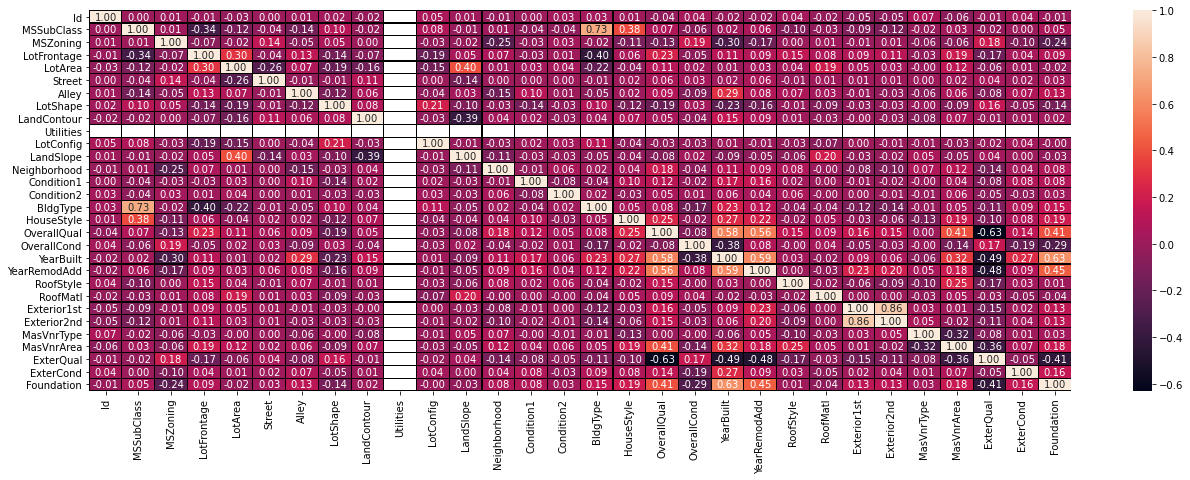

In [205]:
plt.figure(figsize=(22,7))
sns.heatmap(df.iloc[:,:30].corr(),annot=True,linecolor='black',linewidths=0.1,fmt='0.2f')

In [208]:
df.drop('Utilities',axis=1,inplace=True)

<AxesSubplot:>

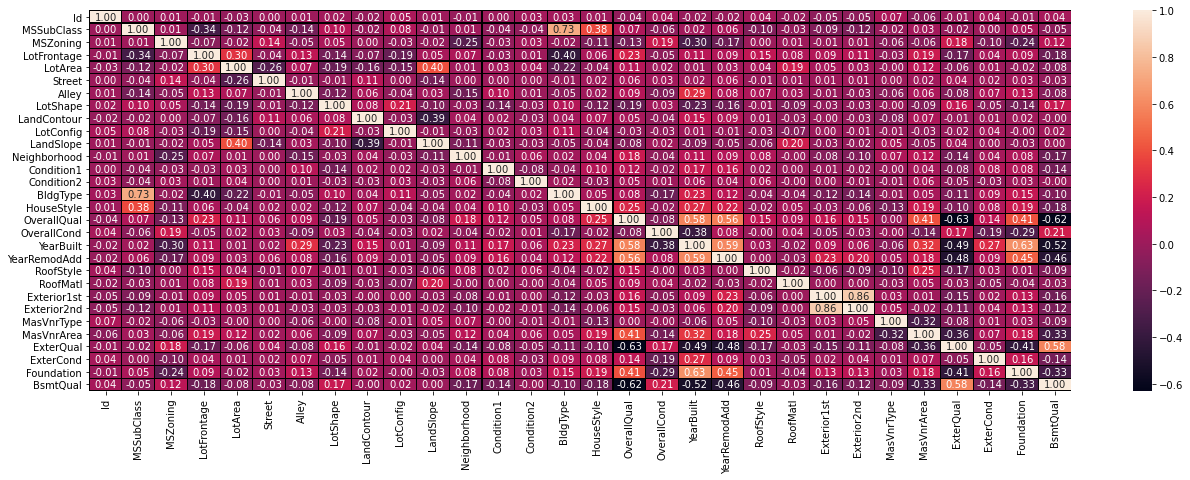

In [209]:
plt.figure(figsize=(22,7))
sns.heatmap(df.iloc[:,:30].corr(),annot=True,linecolor='black',linewidths=0.1,fmt='0.2f')

<AxesSubplot:>

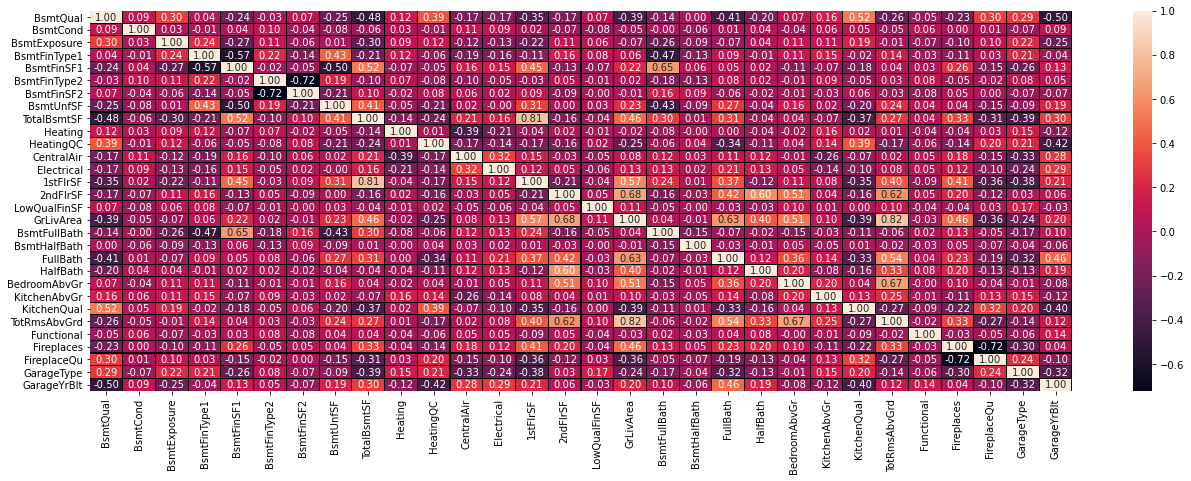

In [206]:
plt.figure(figsize=(22,7))
sns.heatmap(df.iloc[:,30:60].corr(),annot=True,linecolor='black',linewidths=0.1,fmt='0.2f')

<AxesSubplot:>

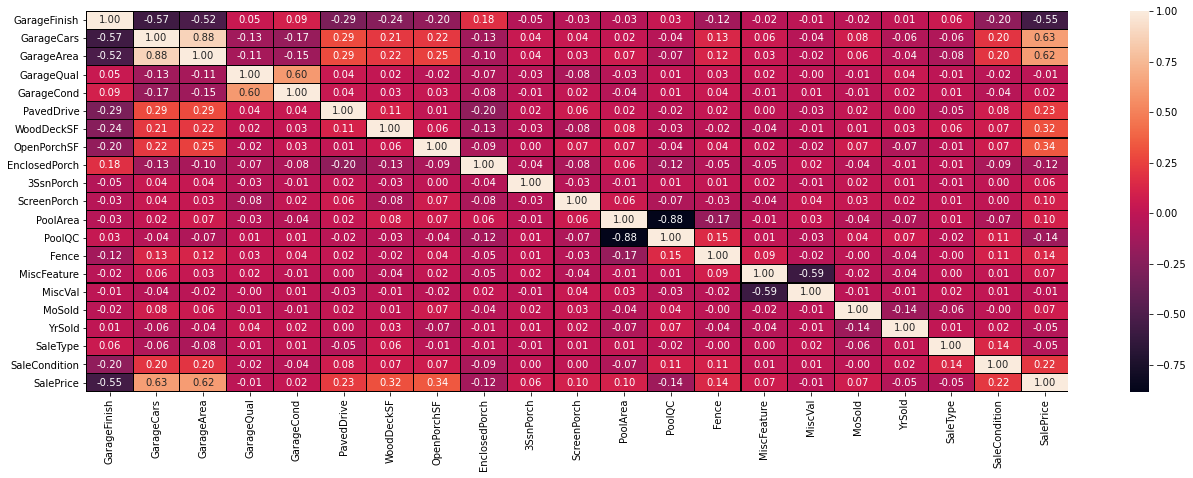

In [207]:
plt.figure(figsize=(22,7))
sns.heatmap(df.iloc[:,60:81].corr(),annot=True,linecolor='black',linewidths=0.1,fmt='0.2f')

In [210]:
df1.describe()

Id  MSSubClass    MSZoning  LotFrontage        LotArea  \
count   292.000000  292.000000  292.000000   292.000000     292.000000   
mean    755.955479   57.414384    2.136986    66.425101   10645.143836   
std     442.565228   43.780649    0.478114    19.975962   13330.669795   
min       6.000000   20.000000    0.000000    21.000000    1526.000000   
25%     377.750000   20.000000    2.000000    57.750000    7200.000000   
50%     778.000000   50.000000    2.000000    66.425101    9200.000000   
75%    1152.250000   70.000000    2.000000    76.000000   11658.750000   
max    1456.000000  190.000000    3.000000   150.000000  215245.000000   

           Street       Alley    LotShape  LandContour   Utilities  ...  \
count  292.000000  292.000000  292.000000   292.000000  292.000000  ...   
mean     0.993151    1.921233    1.958904     2.791096    0.003425  ...   
std      0.082618    0.366971    1.398953     0.699182    0.058521  ...   
min      0.000000    0.000000    0.000000     0.000000    0.000000  ...   
25%      1.000000    2.000000    0.000000     3.000000    0.000000  ...   
50%      1.000000    2.000000    3.000000     3.000000    0.000000  ...   
75%      1.000000    2.000000    3.000000     3.000000    0.000000  ...   
max      1.000000    2.000000    3.000000     3.000000    1.000000  ...   

        3SsnPorch  ScreenPorch  PoolArea       Fence  MiscFeature  \
count  292.000000   292.000000     292.0  292.000000   292.000000   
mean     2.489726    15.099315       0.0    3.623288     1.962329   
std     30.247488    58.483473       0.0    0.949881     0.207965   
min      0.000000     0.000000       0.0    0.000000     0.000000   
25%      0.000000     0.000000       0.0    4.000000     2.000000   
50%      0.000000     0.000000       0.0    4.000000     2.000000   
75%      0.000000     0.000000       0.0    4.000000     2.000000   
max    407.000000   396.000000       0.0    4.000000     2.000000   

           MiscVal      MoSold       YrSold    SaleType  SaleCondition  
count   292.000000  292.000000   292.000000  292.000000     292.000000  
mean     28.184932    6.232877  2007.859589    4.828767       1.914384  
std     224.036218    2.774556     1.322867    0.744829       0.576932  
min       0.000000    1.000000  2006.000000    0.000000       0.000000  
25%       0.000000    4.000000  2007.000000    5.000000       2.000000  
50%       0.000000    6.000000  2008.000000    5.000000       2.000000  
75%       0.000000    8.000000  2009.000000    5.000000       2.000000  
max    3500.000000   12.000000  2010.000000    5.000000       3.000000  

[8 rows x 79 columns]

<AxesSubplot:>

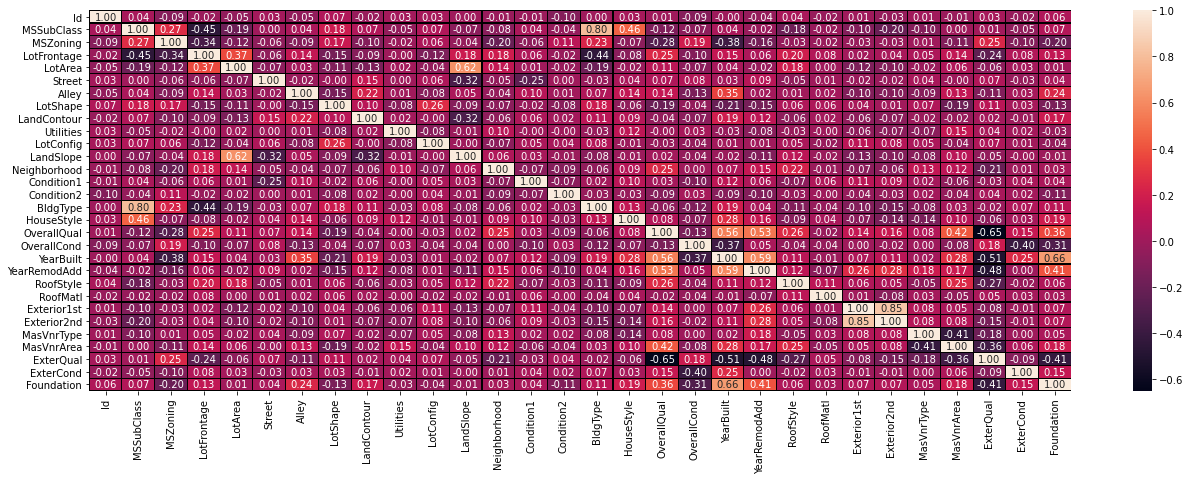

In [211]:
plt.figure(figsize=(22,7))
sns.heatmap(df1.iloc[:,:30].corr(),annot=True,linecolor='black',linewidths=0.1,fmt='0.2f')

<AxesSubplot:>

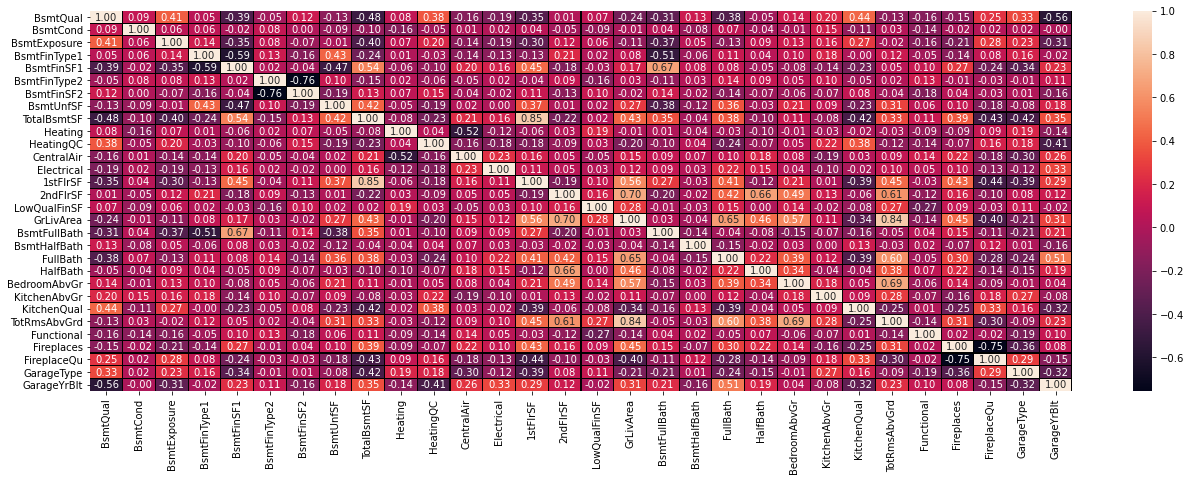

In [212]:
plt.figure(figsize=(22,7))
sns.heatmap(df1.iloc[:,30:60].corr(),annot=True,linecolor='black',linewidths=0.1,fmt='0.2f')

<AxesSubplot:>

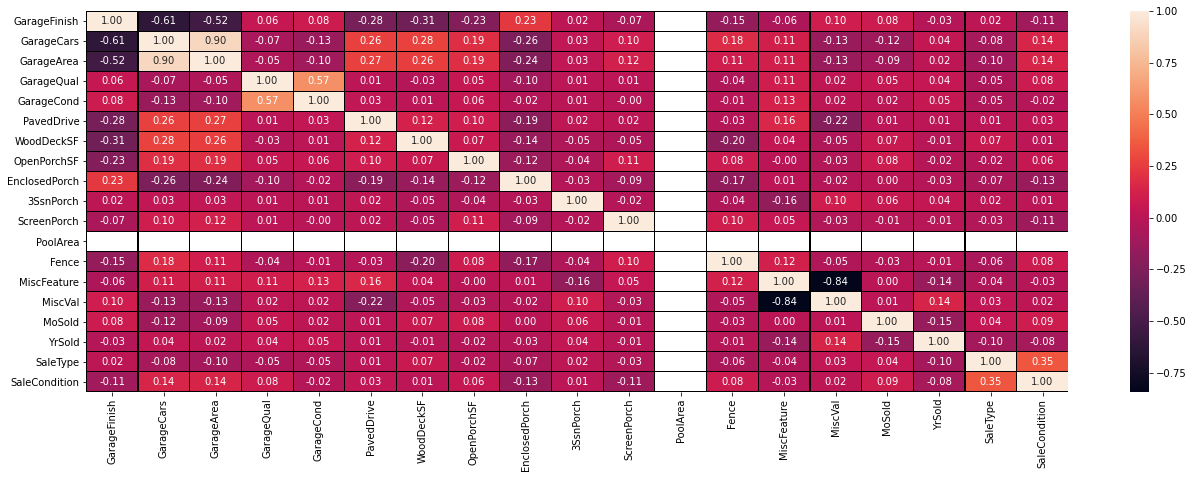

In [213]:
plt.figure(figsize=(22,7))
sns.heatmap(df1.iloc[:,60:79].corr(),annot=True,linecolor='black',linewidths=0.1,fmt='0.2f')

In [217]:
df1.drop('PoolArea',axis=1,inplace=True)

<AxesSubplot:>

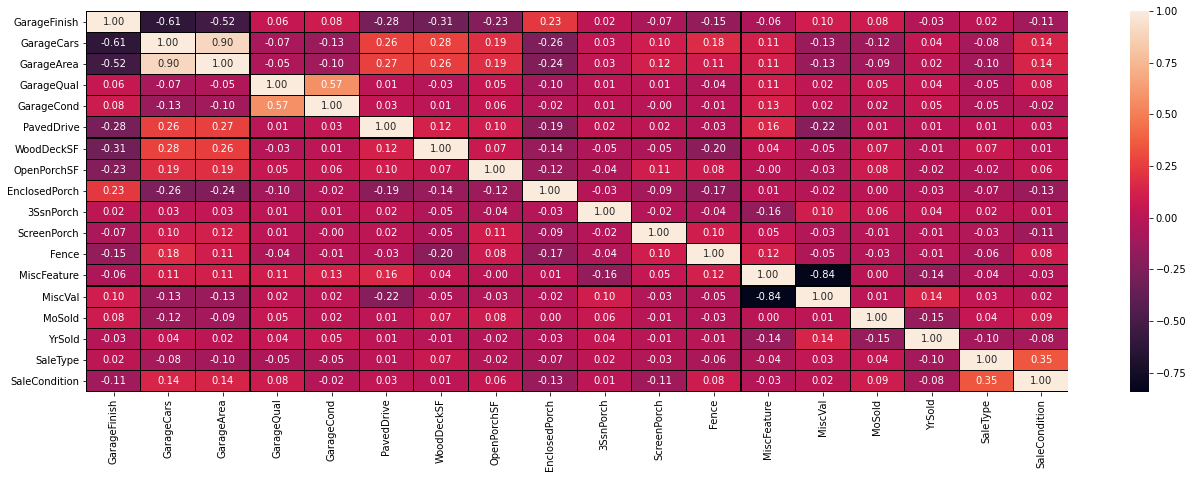

In [218]:
plt.figure(figsize=(22,7))
sns.heatmap(df1.iloc[:,60:79].corr(),annot=True,linecolor='black',linewidths=0.1,fmt='0.2f')

# Checking Outliers

In [219]:
df.skew()

Id                0.026526
MSSubClass        1.422019
MSZoning         -1.796785
LotFrontage       2.710383
LotArea          10.659285
                   ...    
MoSold            0.220979
YrSold            0.115765
SaleType         -3.660513
SaleCondition    -2.671829
SalePrice         1.953878
Length: 79, dtype: float64

In [221]:
df.iloc[:,:30].skew()

Id               0.026526
MSSubClass       1.422019
MSZoning        -1.796785
LotFrontage      2.710383
LotArea         10.659285
Street         -17.021969
Alley           -4.056922
LotShape        -0.603775
LandContour     -3.125982
LotConfig       -1.118821
LandSlope        4.812568
Neighborhood     0.043735
Condition1       3.008289
Condition2      11.514458
BldgType         2.318657
HouseStyle       0.285680
OverallQual      0.175082
OverallCond      0.580714
YearBuilt       -0.579204
YearRemodAdd    -0.495864
RoofStyle        1.498560
RoofMatl         7.577352
Exterior1st     -0.612816
Exterior2nd     -0.592349
MasVnrType       0.113954
MasVnrArea       2.834658
ExterQual       -1.810843
ExterCond       -2.516219
Foundation      -0.002761
BsmtQual        -1.107099
dtype: float64

Taking -/+ 0.5 as the threshold

<AxesSubplot:>

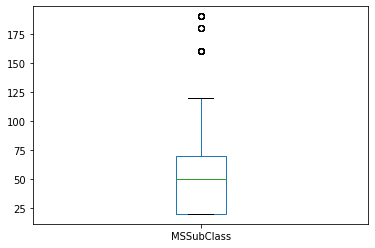

In [222]:
df['MSSubClass'].plot.box()

<AxesSubplot:>

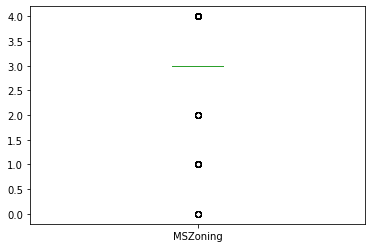

In [223]:
df['MSZoning'].plot.box()

<AxesSubplot:>

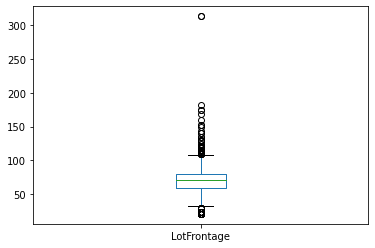

In [224]:
df['LotFrontage'].plot.box()

<AxesSubplot:>

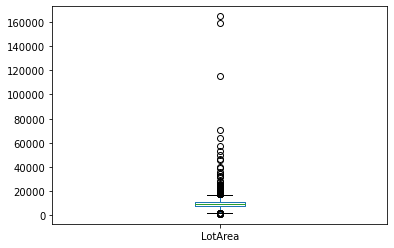

In [225]:
df['LotArea'].plot.box()

<AxesSubplot:>

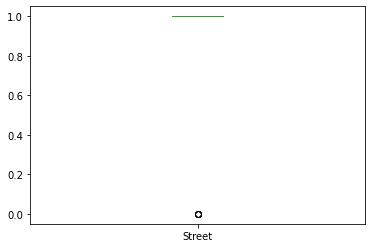

In [226]:
df['Street'].plot.box()

<AxesSubplot:>

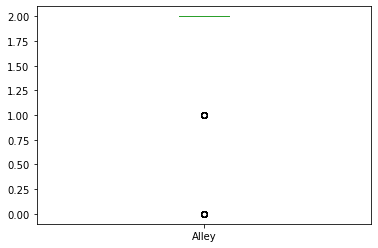

In [227]:
df['Alley'].plot.box()

<AxesSubplot:>

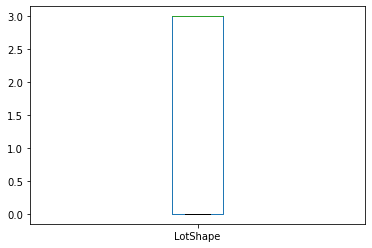

In [228]:
df['LotShape'].plot.box()

<AxesSubplot:>

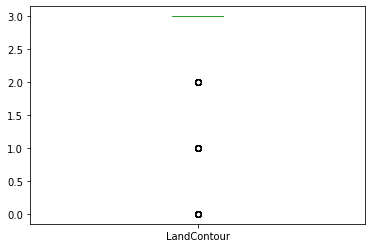

In [229]:
df['LandContour'].plot.box()

<AxesSubplot:>

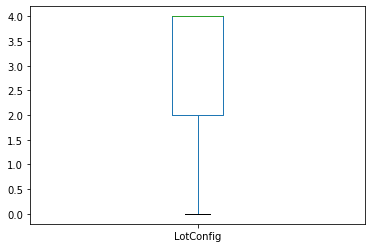

In [230]:
df['LotConfig'].plot.box()

<AxesSubplot:>

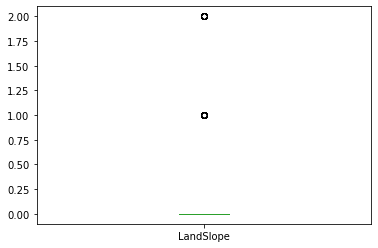

In [231]:
df['LandSlope'].plot.box()

<AxesSubplot:>

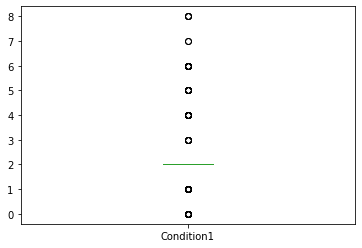

In [232]:
df['Condition1'].plot.box()

<AxesSubplot:>

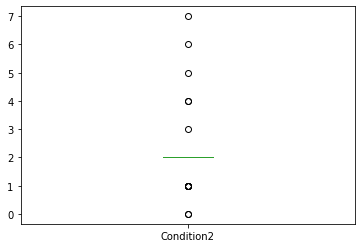

In [233]:
df['Condition2'].plot.box()

<AxesSubplot:>

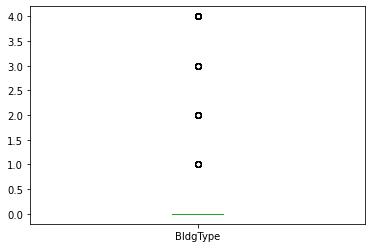

In [234]:
df['BldgType'].plot.box()

<AxesSubplot:>

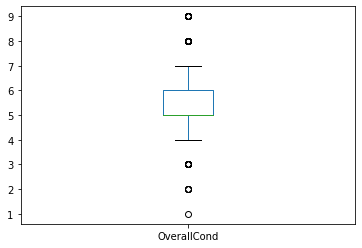

In [235]:
df['OverallCond'].plot.box()

<AxesSubplot:>

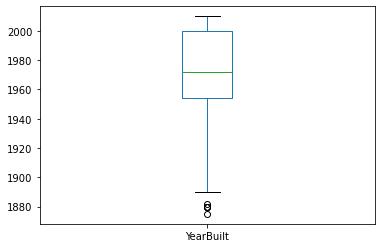

In [236]:
df['YearBuilt'].plot.box()

<AxesSubplot:>

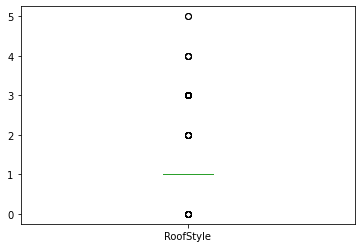

In [237]:
df['RoofStyle'].plot.box()

<AxesSubplot:>

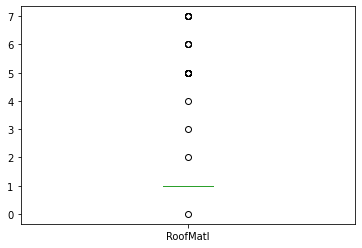

In [238]:
df['RoofMatl'].plot.box()

<AxesSubplot:>

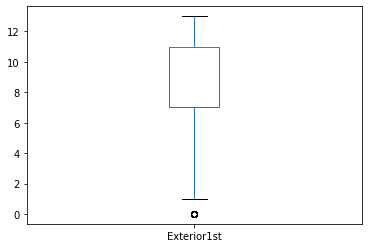

In [239]:
df['Exterior1st'].plot.box()

<AxesSubplot:>

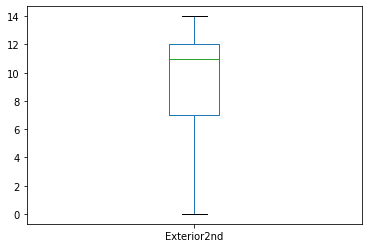

In [240]:
df['Exterior2nd'].plot.box()

<AxesSubplot:>

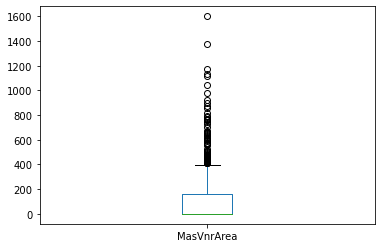

In [241]:
df['MasVnrArea'].plot.box()

<AxesSubplot:>

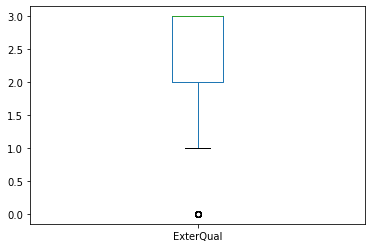

In [242]:
df['ExterQual'].plot.box()

<AxesSubplot:>

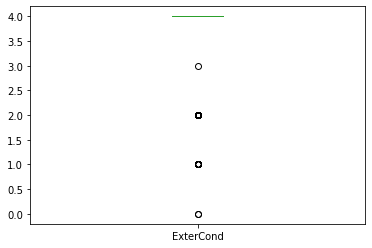

In [243]:
df['ExterCond'].plot.box()

<AxesSubplot:>

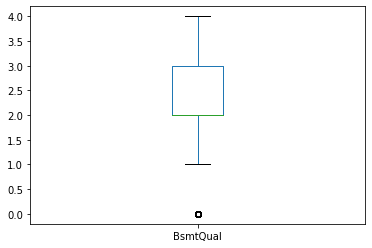

In [244]:
df['BsmtQual'].plot.box()

In [246]:
df.iloc[:,30:60].skew()

BsmtCond        -2.927336
BsmtExposure    -1.075098
BsmtFinType1    -0.019567
BsmtFinSF1       1.871606
BsmtFinType2    -3.388419
BsmtFinSF2       4.365829
BsmtUnfSF        0.909057
TotalBsmtSF      1.744591
Heating         10.103609
HeatingQC        0.449933
CentralAir      -3.475188
Electrical      -3.104209
1stFlrSF         1.513707
2ndFlrSF         0.823479
LowQualFinSF     8.666142
GrLivArea        1.449952
BsmtFullBath     0.627106
BsmtHalfBath     4.264403
FullBath         0.057809
HalfBath         0.656492
BedroomAbvGr     0.243855
KitchenAbvGr     4.365259
KitchenQual     -1.408106
TotRmsAbvGrd     0.644657
Functional      -3.999663
Fireplaces       0.671966
FireplaceQu     -0.794843
GarageType       0.625609
GarageYrBlt     -0.662934
GarageFinish    -0.129987
dtype: float64

<AxesSubplot:>

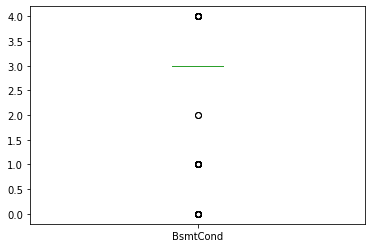

In [247]:
df['BsmtCond'].plot.box()

<AxesSubplot:>

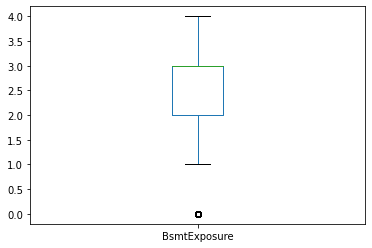

In [248]:
df['BsmtExposure'].plot.box()

<AxesSubplot:>

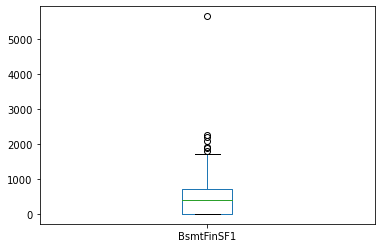

In [249]:
df['BsmtFinSF1'].plot.box()

<AxesSubplot:>

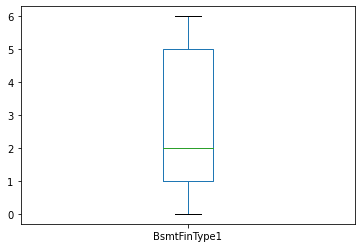

In [250]:
df['BsmtFinType1'].plot.box()

<AxesSubplot:>

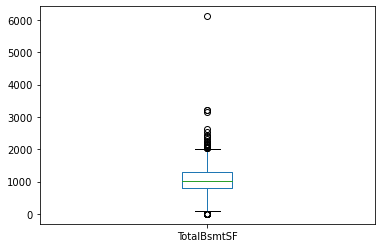

In [253]:
df['TotalBsmtSF'].plot.box()

<AxesSubplot:>

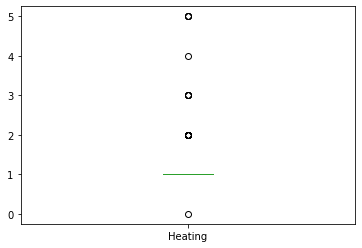

In [254]:
df['Heating'].plot.box()

<AxesSubplot:>

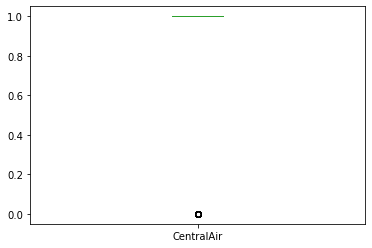

In [255]:
df['CentralAir'].plot.box()

<AxesSubplot:>

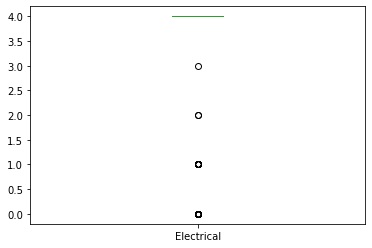

In [256]:
df['Electrical'].plot.box()

<AxesSubplot:>

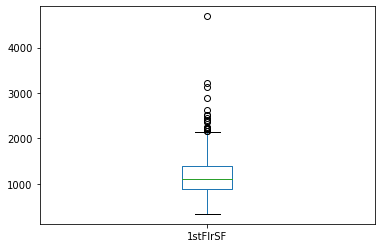

In [257]:
df['1stFlrSF'].plot.box()

<AxesSubplot:>

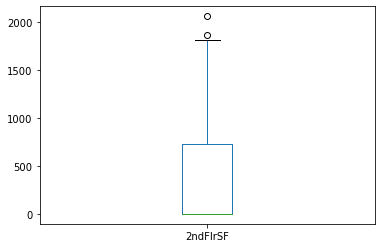

In [258]:
df['2ndFlrSF'].plot.box()

<AxesSubplot:>

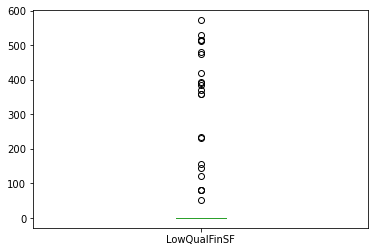

In [259]:
df['LowQualFinSF'].plot.box()

<AxesSubplot:>

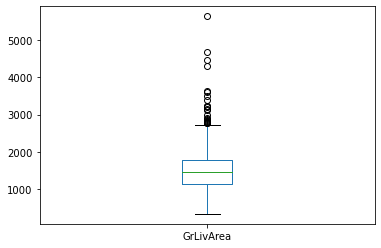

In [260]:
df['GrLivArea'].plot.box()

<AxesSubplot:>

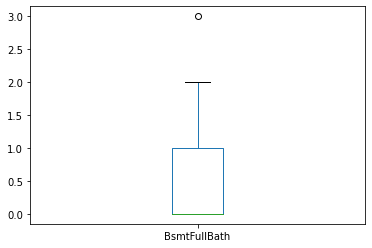

In [261]:
df['BsmtFullBath'].plot.box()

<AxesSubplot:>

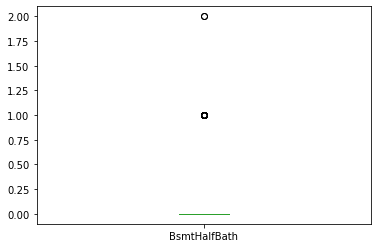

In [262]:
df['BsmtHalfBath'].plot.box()

<AxesSubplot:>

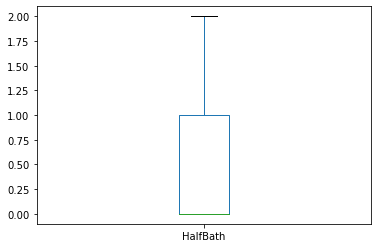

In [263]:
df['HalfBath'].plot.box()

<AxesSubplot:>

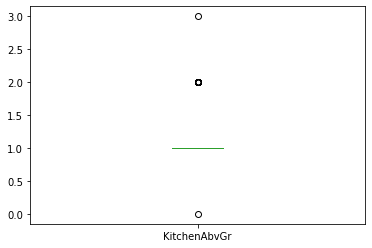

In [264]:
df['KitchenAbvGr'].plot.box()

<AxesSubplot:>

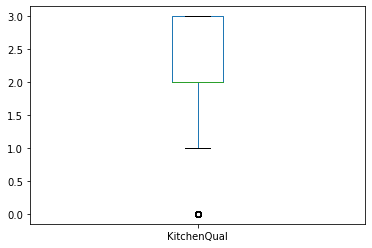

In [265]:
df['KitchenQual'].plot.box()

<AxesSubplot:>

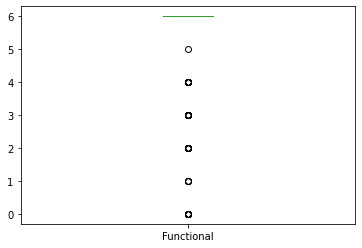

In [266]:
df['Functional'].plot.box()

<AxesSubplot:>

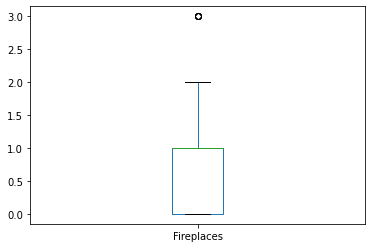

In [267]:
df['Fireplaces'].plot.box()

<AxesSubplot:>

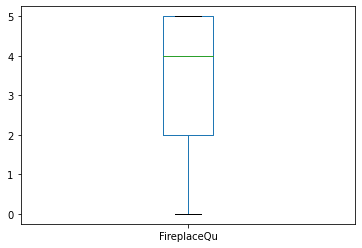

In [268]:
df['FireplaceQu'].plot.box()

<AxesSubplot:>

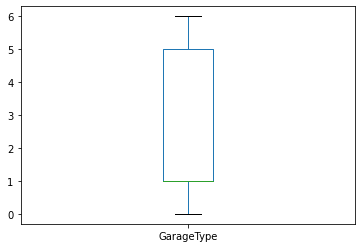

In [269]:
df['GarageType'].plot.box()

<AxesSubplot:>

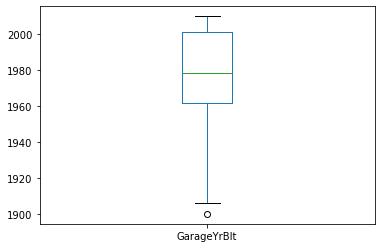

In [270]:
df['GarageYrBlt'].plot.box()

In [271]:
df.iloc[:,60:79].skew()

GarageCars       -0.358556
GarageArea        0.189665
GarageQual       -3.505364
GarageCond       -3.789819
PavedDrive       -3.274035
WoodDeckSF        1.504929
OpenPorchSF       2.410840
EnclosedPorch     3.043610
3SsnPorch         9.770611
ScreenPorch       4.105741
PoolQC          -15.903184
Fence            -1.955758
MiscFeature      -5.406583
MiscVal          23.065943
MoSold            0.220979
YrSold            0.115765
SaleType         -3.660513
SaleCondition    -2.671829
SalePrice         1.953878
dtype: float64

<AxesSubplot:>

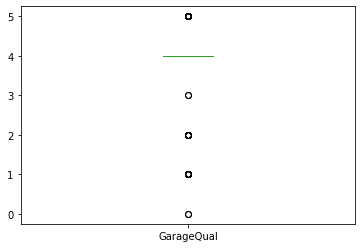

In [272]:
df['GarageQual'].plot.box()

<AxesSubplot:>

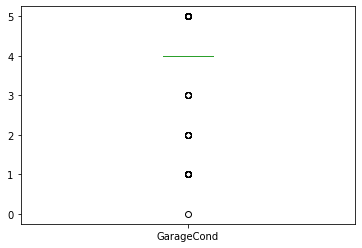

In [273]:
df['GarageCond'].plot.box()

<AxesSubplot:>

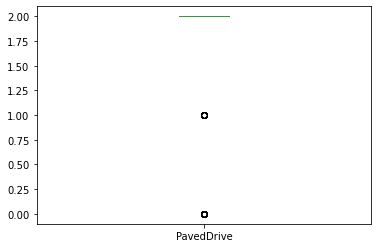

In [274]:
df['PavedDrive'].plot.box()

<AxesSubplot:>

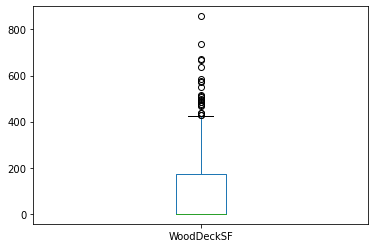

In [275]:
df['WoodDeckSF'].plot.box()

<AxesSubplot:>

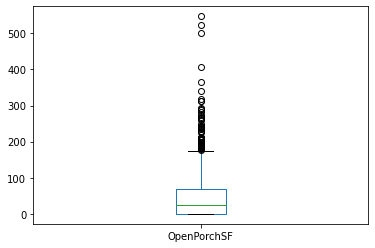

In [276]:
df['OpenPorchSF'].plot.box()

<AxesSubplot:>

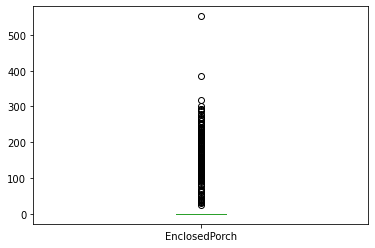

In [277]:
df['EnclosedPorch'].plot.box()

<AxesSubplot:>

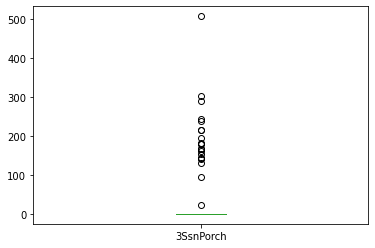

In [278]:
df['3SsnPorch'].plot.box()

<AxesSubplot:>

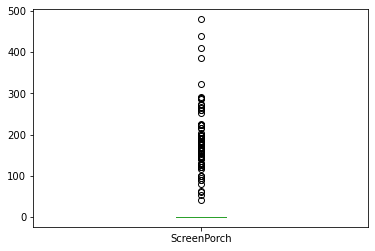

In [279]:
df['ScreenPorch'].plot.box()

<AxesSubplot:>

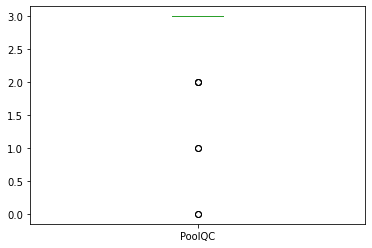

In [280]:
df['PoolQC'].plot.box()

<AxesSubplot:>

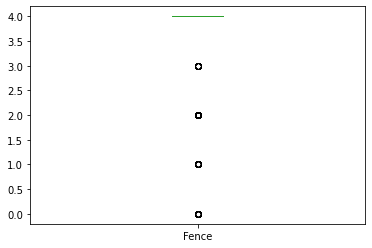

In [281]:
df['Fence'].plot.box()

<AxesSubplot:>

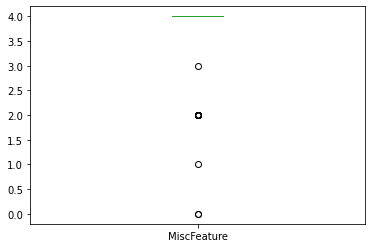

In [282]:
df['MiscFeature'].plot.box()

<AxesSubplot:>

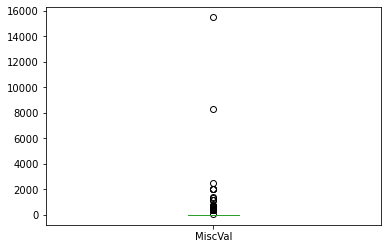

In [283]:
df['MiscVal'].plot.box()

<AxesSubplot:>

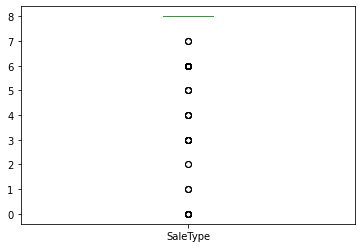

In [284]:
df['SaleType'].plot.box()

<AxesSubplot:>

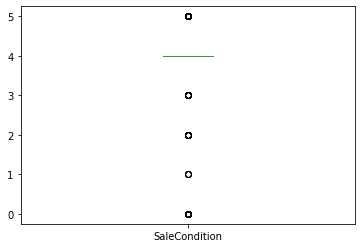

In [285]:
df['SaleCondition'].plot.box()

<AxesSubplot:>

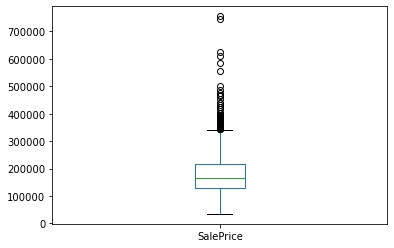

In [286]:
df['SalePrice'].plot.box()

In [287]:
df1.skew()

Id               -0.108806
MSSubClass        1.358597
MSZoning          0.187174
LotFrontage       0.466813
LotArea          12.781805
                   ...    
MiscVal          13.264758
MoSold            0.186504
YrSold            0.018412
SaleType         -5.489874
SaleCondition    -2.161104
Length: 78, dtype: float64

# Removing Outliers

In [288]:
df.shape

(1168, 79)

In [289]:
from scipy.stats import zscore

In [290]:
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([   1,    1,    1, ..., 1166, 1166, 1166]),
 array([10, 21, 35, ..., 40, 63, 64]))

In [291]:
df=df[(z<3).all(axis=1)]
df

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  \
0      127         120         3     70.98847     4928       1      2   
2      793          60         3     92.00000     9920       1      2   
5     1197          60         3     58.00000    14054       1      2   
6      561          20         3     70.98847    11341       1      2   
11     833          60         3     44.00000     9548       1      2   
...    ...         ...       ...          ...      ...     ...    ...   
1158   673          20         3     70.98847    11250       1      2   
1161  1301          60         3     70.98847    10762       1      2   
1163   289          20         3     70.98847     9819       1      2   
1165   196         160         3     24.00000     2280       1      2   
1167   617          60         3     70.98847     7861       1      2   

      LotShape  LandContour  LotConfig  ...  ScreenPorch  PoolQC  Fence  \
0            0            3          4  ...            0       3      4   
2            0            3          1  ...            0       3      4   
5            0            3          4  ...            0       3      4   
6            0            3          4  ...           95       3      4   
11           0            3          1  ...            0       3      4   
...        ...          ...        ...  ...          ...     ...    ...   
1158         0            3          4  ...            0       3      4   
1161         0            3          1  ...            0       3      4   
1163         0            3          4  ...            0       3      2   
1165         3            3          2  ...            0       3      4   
1167         0            3          4  ...            0       3      4   

      MiscFeature  MiscVal  MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0               4        0       2    2007         8              4     128000  
2               4        0       6    2007         8              4     269790  
5               4        0      11    2006         6              5     219210  
6               4        0       5    2010         8              4     121500  
11              4        0       1    2010         8              4     237000  
...           ...      ...     ...     ...       ...            ...        ...  
1158            4        0       6    2006         8              4     165000  
1161            4        0       5    2009         8              4     225000  
1163            4        0       2    2010         8              4     122000  
1165            4        0       7    2009         8              4     148500  
1167            4        0       6    2006         8              4     183200  

[447 rows x 79 columns]

In [292]:
Data_loss=((1168-447)/1168)*100
Data_loss

61.72945205479452

In [293]:
df1.shape

(292, 78)

In [294]:
z=np.abs(zscore(df1))
threshold=3
np.where(z>3)

(array([  1,   1,   3,   8,   8,   8,   9,  10,  10,  10,  11,  12,  12,
         12,  13,  13,  13,  13,  14,  15,  15,  20,  20,  23,  23,  23,
         23,  23,  23,  23,  24,  24,  24,  29,  29,  29,  30,  30,  31,
         32,  33,  33,  34,  34,  34,  36,  38,  40,  45,  45,  46,  46,
         47,  47,  47,  47,  49,  50,  50,  51,  52,  53,  53,  54,  55,
         55,  55,  58,  58,  58,  58,  58,  58,  66,  67,  69,  71,  71,
         71,  71,  71,  71,  72,  72,  72,  73,  73,  73,  74,  79,  81,
         81,  81,  81,  82,  82,  83,  83,  85,  85,  85,  86,  86,  86,
         87,  88,  91,  92,  92,  92, 102, 102, 102, 105, 105, 105, 105,
        105, 106, 106, 107, 107, 107, 109, 109, 109, 112, 112, 113, 113,
        114, 115, 115, 115, 116, 117, 118, 119, 122, 122, 123, 123, 124,
        124, 124, 125, 127, 127, 127, 127, 128, 128, 128, 128, 128, 129,
        129, 129, 130, 130, 133, 133, 134, 134, 134, 139, 140, 140, 140,
        141, 141, 141, 141, 141, 141, 141, 142, 142

In [295]:
df1=df1[(z<3).all(axis=1)]
df1

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  \
0     337          20         2    86.000000    14157       1      2   
2     929          20         2    66.425101    11838       1      2   
4    1227          60         2    86.000000    14598       1      2   
5     650         180         3    21.000000     1936       1      2   
6    1453         180         3    35.000000     3675       1      2   
..    ...         ...       ...          ...      ...     ...    ...   
278  1005         120         2    43.000000     3182       1      2   
283  1116          20         2    93.000000    12085       1      2   
285    72          20         2    69.000000     7599       1      2   
287    83          20         2    78.000000    10206       1      2   
290   523          50         3    50.000000     5000       1      2   

     LotShape  LandContour  Utilities  ...  EnclosedPorch  3SsnPorch  \
0           0            1          0  ...              0          0   
2           3            3          0  ...              0          0   
4           0            3          0  ...              0          0   
5           3            3          0  ...              0          0   
6           3            3          0  ...              0          0   
..        ...          ...        ...  ...            ...        ...   
278         3            3          0  ...              0          0   
283         3            3          0  ...              0          0   
285         3            3          0  ...              0          0   
287         3            3          0  ...              0          0   
290         3            3          0  ...             36          0   

     ScreenPorch  Fence  MiscFeature  MiscVal  MoSold  YrSold  SaleType  \
0              0      4            2        0       7    2007         5   
2              0      4            2        0       6    2009         5   
4              0      4            2        0       1    2008         5   
5              0      2            2        0      12    2007         5   
6              0      4            2        0       5    2006         5   
..           ...    ...          ...      ...     ...     ...       ...   
278            0      4            2        0       5    2009         5   
283            0      4            2        0      11    2007         4   
285            0      4            2        0       6    2007         5   
287            0      4            2        0      10    2008         5   
290            0      4            2        0      10    2006         5   

     SaleCondition  
0                2  
2                2  
4                2  
5                2  
6                2  
..             ...  
278              2  
283              3  
285              2  
287              2  
290              2  

[131 rows x 78 columns]

In [296]:
Data_loss1=((292-131)/292)*100
Data_loss1

55.13698630136986

# Separating x and y

In [299]:
x=df.drop('SalePrice',axis=1)
y=df['SalePrice']

In [301]:
train=df
test=df1

# Transforming Dataset

In [305]:
from sklearn.preprocessing import power_transform
import warnings
warnings.filterwarnings('ignore')

In [306]:
x=power_transform(x,method='yeo-johnson')
x

array([[-1.44911455,  1.35150121, -0.21440046, ..., -0.59427539,
         0.38613502, -0.21949168],
       [ 0.05028543,  0.62661121, -0.21440046, ..., -0.59427539,
         0.38613502, -0.21949168],
       [ 1.0543844 ,  0.62661121, -0.21440046, ..., -1.39287864,
        -2.58976765,  2.208914  ],
       ...,
       [-1.06720318, -1.06725231, -0.21440046, ...,  1.52673476,
         0.38613502, -0.21949168],
       [-1.28030465,  1.60084805, -0.21440046, ...,  0.85994454,
         0.38613502, -0.21949168],
       [-0.35046671,  0.62661121, -0.21440046, ..., -1.39287864,
         0.38613502, -0.21949168]])

# Scaling Data

In [307]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [308]:
x=sc.fit_transform(x)
x

array([[-1.44911455,  1.35150121, -0.21440046, ..., -0.59427539,
         0.38613502, -0.21949168],
       [ 0.05028543,  0.62661121, -0.21440046, ..., -0.59427539,
         0.38613502, -0.21949168],
       [ 1.0543844 ,  0.62661121, -0.21440046, ..., -1.39287864,
        -2.58976765,  2.208914  ],
       ...,
       [-1.06720318, -1.06725231, -0.21440046, ...,  1.52673476,
         0.38613502, -0.21949168],
       [-1.28030465,  1.60084805, -0.21440046, ...,  0.85994454,
         0.38613502, -0.21949168],
       [-0.35046671,  0.62661121, -0.21440046, ..., -1.39287864,
         0.38613502, -0.21949168]])

# Model Selection

In [309]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [311]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f'At random state{i}, the training accuracy is :- {r2_score(y_train,pred_train)}')
    print(f'At random state{i}, the testing accuracy is :- {r2_score(y_test,pred_test)}')
    print('\n')

At random state0, the training accuracy is :- 0.914330460374951
At random state0, the testing accuracy is :- 0.8813846738041211


At random state1, the training accuracy is :- 0.9129543893643324
At random state1, the testing accuracy is :- -7.875069459853597e+17


At random state2, the training accuracy is :- 0.9005201119677728
At random state2, the testing accuracy is :- -2.5626942193319622e+23


At random state3, the training accuracy is :- 0.925922052168659
At random state3, the testing accuracy is :- 0.8254182751886743


At random state4, the training accuracy is :- 0.9102679053998776
At random state4, the testing accuracy is :- -2035900261389716.5


At random state5, the training accuracy is :- 0.9161516219819874
At random state5, the testing accuracy is :- 0.8729958154207746


At random state6, the training accuracy is :- 0.9093531349617634
At random state6, the testing accuracy is :- 0.9006391217626378


At random state7, the training accuracy is :- 0.9211939637290185
At random 

In [312]:
 x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=23)

In [313]:
pred_test=lr.predict(x_test)
pred_test

array([154671.01108124, 157898.70440166, 128624.03835684, 288965.63092345,
       253530.14751811, 261724.95156109, 129841.21324756, 314274.17125271,
       217573.90238145, 202458.37816783, 225443.06532276, 288384.32155682,
       164442.25761742, 237630.16703559, 258782.9227616 , 133317.2617061 ,
        73291.73483964, 220519.42112117, 177569.07762646, 144769.93184014,
       149974.62968977, 229526.7385955 , 186302.51028843, 272604.82100334,
        89565.16566705, 105187.64673382, 179419.38853523,  58199.96590544,
       107045.65960445, 199628.8820897 , 153087.90462776, 115177.52268668,
       258053.34473523, 188656.09627778, 187614.716715  , 144762.21850285,
       196352.52338305, 108826.91722442, 120308.46853553, 305113.04832122,
       215578.19515935,  87966.81922156, 135789.34926077, 138721.09193862,
       184762.70547357,  91203.83969544, 298832.78794088, 155287.7516135 ,
       112900.81703433, 201048.44020065, 184145.50985699, 134013.59190055,
       215747.22188946, 2

In [314]:
print(r2_score(y_test,pred_test))

0.937370477692747


# Cross Validation Score

In [315]:
Train_accuracy=r2_score(y_train,pred_train)
Test_accuracy=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold {j} the cv score is {cv_mean} and the accuracy score for training is {Train_accuracy} and the accuracy score for testing is {Test_accuracy}')
    print('\n')      

At cross fold 2 the cv score is -4.5638303053083295e+23 and the accuracy score for training is -1.0366232418052452 and the accuracy score for testing is 0.937370477692747


At cross fold 3 the cv score is -1.9228240176562236e+21 and the accuracy score for training is -1.0366232418052452 and the accuracy score for testing is 0.937370477692747


At cross fold 4 the cv score is -1.8443165125106481e+22 and the accuracy score for training is -1.0366232418052452 and the accuracy score for testing is 0.937370477692747


At cross fold 5 the cv score is -8.453355122144353e+24 and the accuracy score for training is -1.0366232418052452 and the accuracy score for testing is 0.937370477692747


At cross fold 6 the cv score is -8.573864363598476e+19 and the accuracy score for training is -1.0366232418052452 and the accuracy score for testing is 0.937370477692747


At cross fold 7 the cv score is -4.16464013009696e+22 and the accuracy score for training is -1.0366232418052452 and the accuracy score f

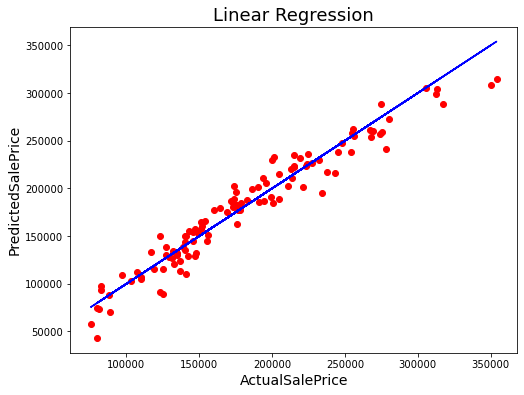

In [317]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test,color='red')
plt.plot(y_test,y_test,color='b')
plt.xlabel('ActualSalePrice',fontsize=14)
plt.ylabel('PredictedSalePrice',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

# Regularization

In [318]:
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [319]:
from sklearn.linear_model import Lasso 
parameters={'alpha':[.0001,.001,.01,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [320]:
ls=Lasso(alpha=10,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls= ls.predict(x_test)

lss=r2_score(y_test,pred_ls)
lss

0.9133942468296565

In [324]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.8600450872159244

# Ensemble Technique

In [325]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'sqrt'}


In [326]:
rf=RandomForestRegressor(criterion='mae',max_features='sqrt')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision = rf.predict(x_test)


rfs=r2_score(y_test,pred_decision)
print('R2 score :',rfs*100)

rfscore= cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()
print('Cross Val Score :',rfc*100)


R2 score : 90.41188758450276
Cross Val Score : 86.77333969886544


# Saving the Model

In [327]:
import pickle
filename='SalePrice.pk1'
pickle.dump(rf, open(filename,'wb'))

# Conclusion:-

In [328]:
loaded_model=pickle.load(open('SalePrice.pk1','rb'))
result=loaded_model.score(x_test,y_test)
print(result)

0.9041188758450276


In [329]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],index=['Predicted','Original'])
conclusion

0         1          2         3          4          5    \
Predicted  142560.5  144290.4  142492.32  298178.0  235621.89  255842.38   
Original   142560.5  144290.4  142492.32  298178.0  235621.89  255842.38   

                6          7         8          9    ...        102  \
Predicted  137581.0  305570.84  194919.8  194989.57  ...  142896.58   
Original   137581.0  305570.84  194919.8  194989.57  ...  142896.58   

                 103       104        105        106        107        108  \
Predicted  237043.66  211677.8  178255.96  223987.61  138703.76  117575.16   
Original   237043.66  211677.8  178255.96  223987.61  138703.76  117575.16   

                 109        110        111  
Predicted  188761.37  126623.68  188473.59  
Original   188761.37  126623.68  188473.59  

[2 rows x 112 columns]